In [1]:
# def emotion_analysis(emotions):
#     objects = ('angry', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprise')
#     y_pos = np.arange(len(objects))
    
#     plt.bar(y_pos, emotions, align='center', alpha=0.5)
#     plt.xticks(y_pos, objects)
#     plt.ylabel('percentage')
#     plt.title('emotion')
    
#     plt.show()

In [2]:
from itertools import count
import numpy as np
import argparse
import cv2
from PIL import ImageGrab
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import csv
import time
import socket
from imutils.video import VideoStream
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import pandas
from sklearn import model_selection
# from sklearn.linear_model import LogisticRegression
import joblib
import pandas as pd

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.load_weights('C:/Users/User/Desktop/ERS/model.h5')

In [3]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
#     objects = ('angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

In [4]:
# from IPython.display import display, Javascript
# from google.colab.output import eval_js
# from base64 import b64decode

def take_photo(folder='C:/Users/User/Desktop/test/angry'):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        
        if img is not None:
            images.append(img)

        return img
# print(img.dtype)

In [5]:
folder='C:/Users/User/Desktop/test/angry'

images = []
for filename in os.listdir(folder):
    img = cv2.imread(os.path.join(folder,filename))

    if img is not None:
        images.append(img)
        
#         img.astype(float)     
# a = np.array(img, dtype=np.float16)
# print(img.astype(float).dtype)        
print(img.dtype)
print(img)
# print(img.dtype)



uint8
[[[195 195 195]
  [206 206 206]
  [215 215 215]
  ...
  [ 74  74  74]
  [ 62  62  62]
  [ 54  54  54]]

 [[191 191 191]
  [202 202 202]
  [220 220 220]
  ...
  [ 68  68  68]
  [ 61  61  61]
  [ 54  54  54]]

 [[188 188 188]
  [203 203 203]
  [209 209 209]
  ...
  [ 67  67  67]
  [ 60  60  60]
  [ 52  52  52]]

 ...

 [[142 142 142]
  [132 132 132]
  [134 134 134]
  ...
  [219 219 219]
  [220 220 220]
  [219 219 219]]

 [[151 151 151]
  [135 135 135]
  [135 135 135]
  ...
  [214 214 214]
  [217 217 217]
  [216 216 216]]

 [[158 158 158]
  [143 143 143]
  [137 137 137]
  ...
  [205 205 205]
  [207 207 207]
  [212 212 212]]]


In [6]:
take_photo()

# print(take_photo.dtype)

array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [ 16,  16,  16],
        [  0,   0,   0],
        [161, 161, 161]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [ 17,  17,  17],
        [  0,   0,   0],
        [122, 122, 122]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [ 26,  26,  26],
        [  0,   0,   0],
        [114, 114, 114]],

       ...,

       [[ 66,  66,  66],
        [ 86,  86,  86],
        [ 99,  99,  99],
        ...,
        [255, 255, 255],
        [252, 252, 252],
        [254, 254, 254]],

       [[ 84,  84,  84],
        [ 92,  92,  92],
        [ 92,  92,  92],
        ...,
        [236, 236, 236],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 93,  93,  93],
        [ 90,  90,  90],
        [ 85,  85,  85],
        ...,
        [ 42,  42,  42],
        [129, 129, 129],
        [180, 180, 180]]

In [7]:
import cv2
import os
import numpy as np
import torch

folder='C:/Users/User/Desktop/test/angry'

images = []
# for filename in os.listdir(folder):
#     img = cv2.imread(os.path.join(folder,filename))

#     if img is not None:
#         images.append(img)
        
# print(images)
def facecrop(image):  
    facedata = 'C:/Users/User/Desktop/ERS/haar cascade files/haarcascade_frontalface_default.xml'
    cascade = cv2.CascadeClassifier(facedata)
    img_num = 0
    
    for filename in os.listdir(folder):
        img_num += 1
        img = cv2.imread(os.path.join(folder,filename))
        
        if img is not None:
            images.append(img)

        try:

            minisize = (img.shape[1],img.shape[0])
            miniframe = cv2.resize(img, minisize)

            faces = cascade.detectMultiScale(miniframe)

            for f in faces:
                x, y, w, h = [ v for v in f ]
                cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

                sub_face = img[y:y+h, x:x+w]


                cv2.imwrite('C:/Users/User/Desktop/test/angry_valid/capture{0}.jpg'.format(img_num), sub_face)
                #print ("Writing: " + image)

        except Exception as e:
            print (e)

   

if __name__ == '__main__':
   facecrop('C:/Users/User/Desktop/test/angry/im0.png')
#Testing a file.


# Redo comment below
# ------------------------------------------------------------------------------------------


1


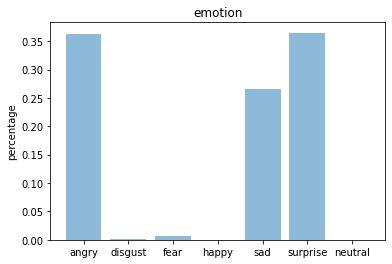

[[3.6201590e-01 6.6105212e-04 5.9883660e-03 1.3371818e-05 2.6647758e-01
  3.6481938e-01 2.4372719e-05]]
0.36481938


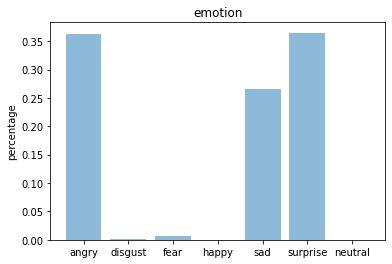

None


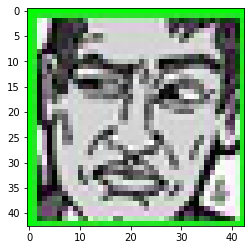

2


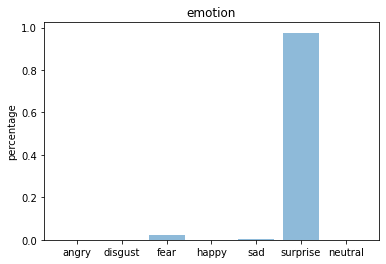

[[6.7254942e-04 4.9020431e-04 2.0856755e-02 1.9766232e-04 2.2260479e-03
  9.7554398e-01 1.2787031e-05]]
0.975544


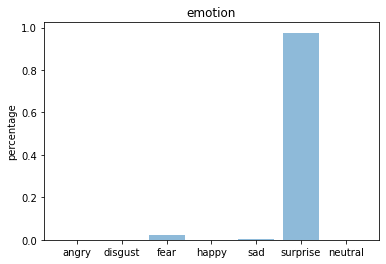

None


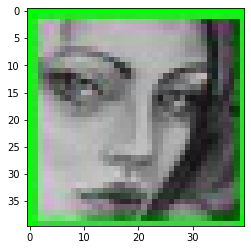

3


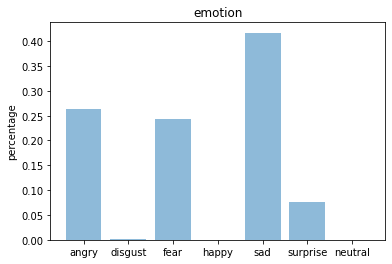

[[2.6294085e-01 8.7857398e-04 2.4257475e-01 2.3890895e-04 4.1704333e-01
  7.5993083e-02 3.3052408e-04]]
0.41704333


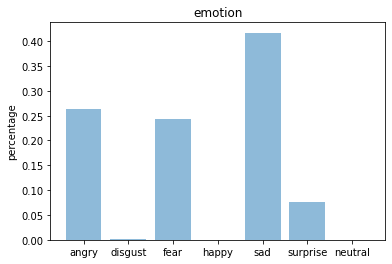

None


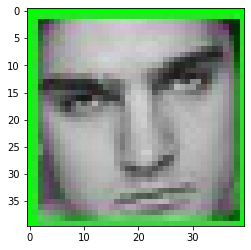

4
Image doesn't exist
5
Image doesn't exist
6


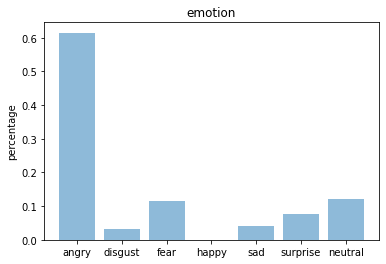

[[6.14686072e-01 3.30022871e-02 1.13758504e-01 2.31020807e-04
  4.13280129e-02 7.69807622e-02 1.20013289e-01]]
0.6146861


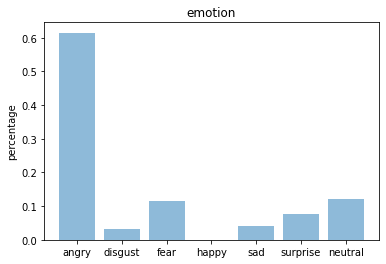

None


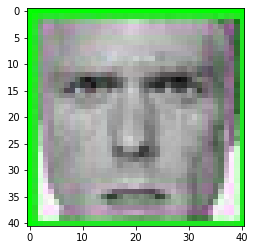

7


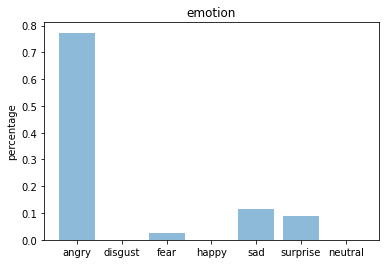

[[7.73217916e-01 4.48817955e-05 2.36511938e-02 9.54805568e-09
  1.14850566e-01 8.82284269e-02 6.97203313e-06]]
0.7732179


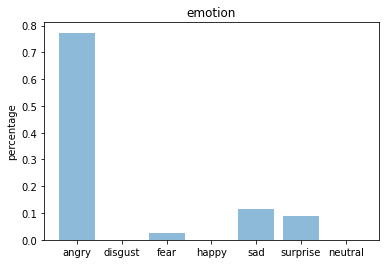

None


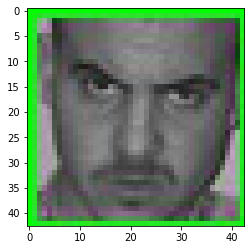

8
Image doesn't exist
9
Image doesn't exist
10


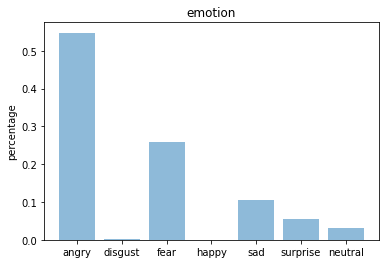

[[5.4766685e-01 2.7460882e-03 2.5787914e-01 4.6365611e-05 1.0451526e-01
  5.5560157e-02 3.1586152e-02]]
0.54766685


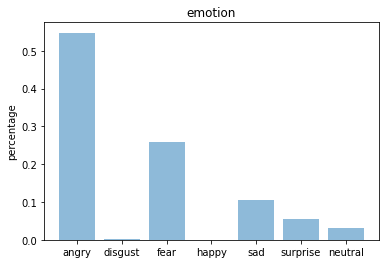

None


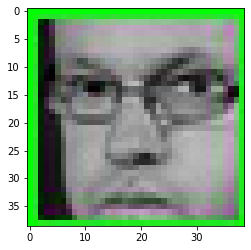

11
Image doesn't exist
12
Image doesn't exist
13


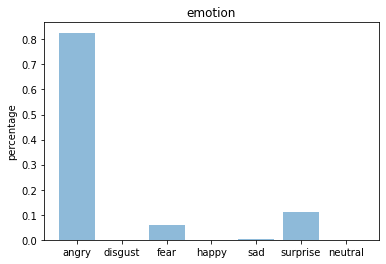

[[8.2651627e-01 4.3831734e-04 6.0895704e-02 1.2275749e-08 1.3027694e-03
  1.1084549e-01 1.3776354e-06]]
0.8265163


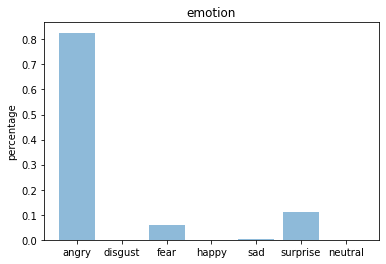

None


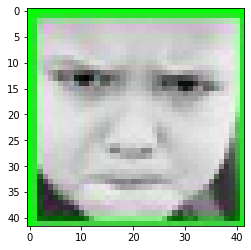

14


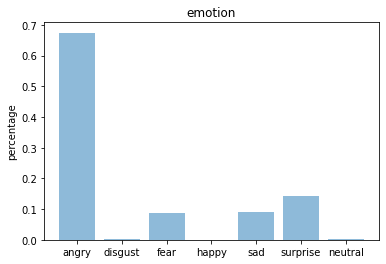

[[6.7441356e-01 3.4800591e-03 8.6232752e-02 8.3426238e-07 9.0170026e-02
  1.4413390e-01 1.5688906e-03]]
0.67441356


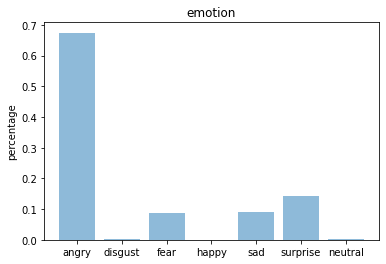

None


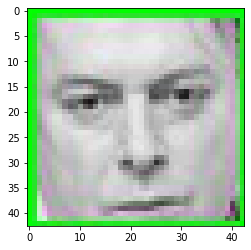

15


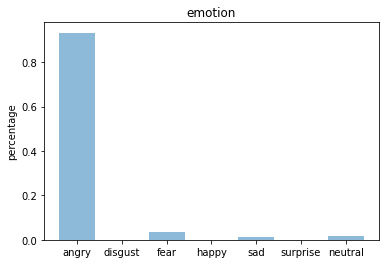

[[9.3300688e-01 1.1646207e-05 3.5386469e-02 7.0109803e-05 1.4573743e-02
  4.4522132e-04 1.6505908e-02]]
0.9330069


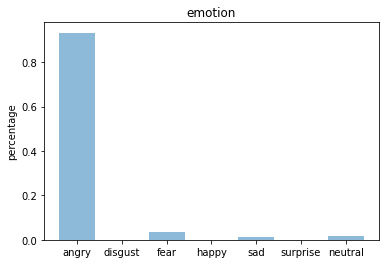

None


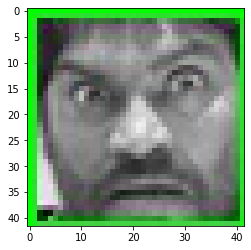

16


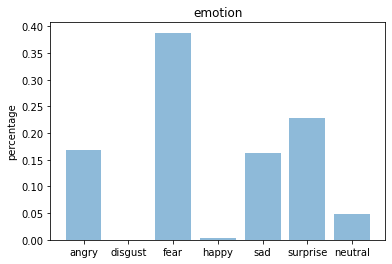

[[1.6745143e-01 3.4037683e-05 3.8815656e-01 3.9202869e-03 1.6345134e-01
  2.2847597e-01 4.8510388e-02]]
0.38815656


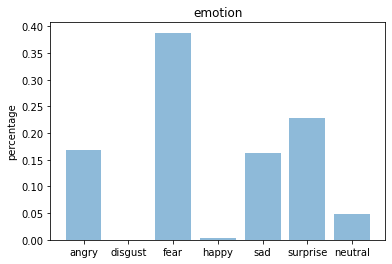

None


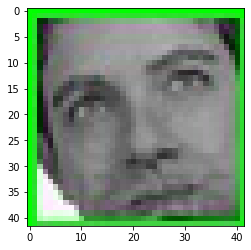

17


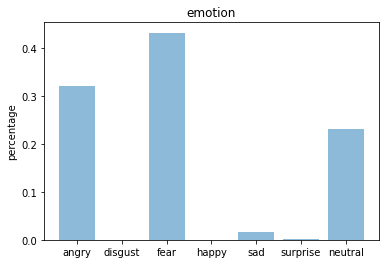

[[3.1959000e-01 3.4989600e-05 4.3131796e-01 1.0772437e-04 1.7026490e-02
  7.0829620e-04 2.3121455e-01]]
0.43131796


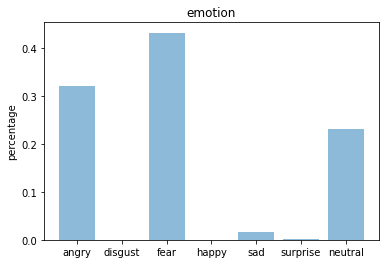

None


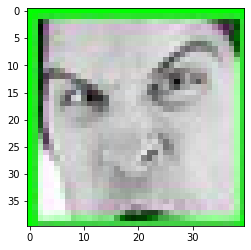

18


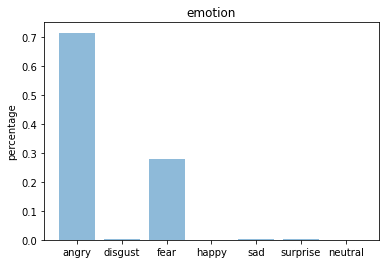

[[7.1420836e-01 2.8434035e-03 2.7820575e-01 2.6208963e-07 1.8740011e-03
  2.1055408e-03 7.6265953e-04]]
0.71420836


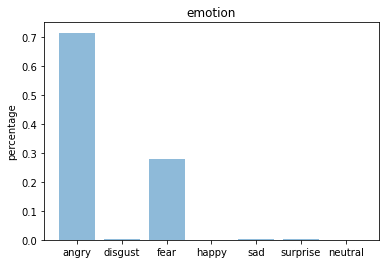

None


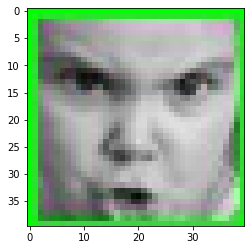

19
Image doesn't exist
20
Image doesn't exist
21


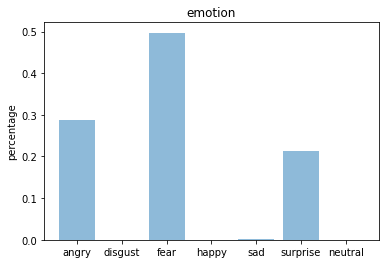

[[2.8699508e-01 1.5656925e-04 4.9710816e-01 9.5520463e-09 1.9549266e-03
  2.1378502e-01 2.5061448e-07]]
0.49710816


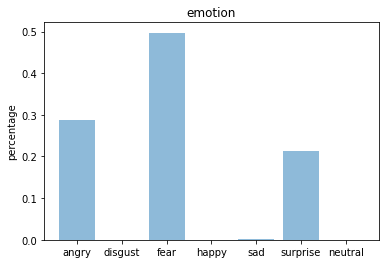

None


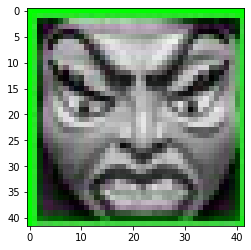

22


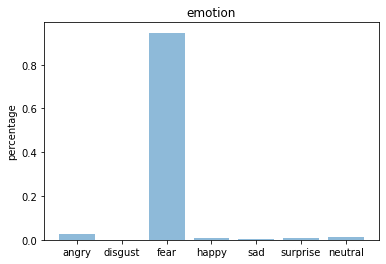

[[2.7025416e-02 3.3457688e-04 9.4592780e-01 6.4957105e-03 3.1531660e-03
  6.3140136e-03 1.0749277e-02]]
0.9459278


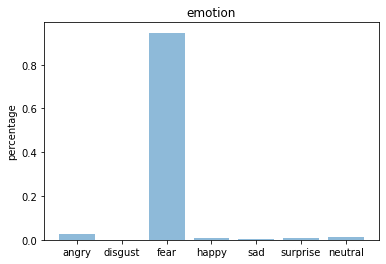

None


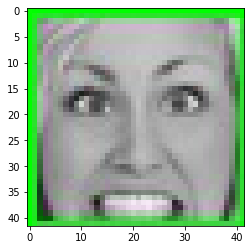

23


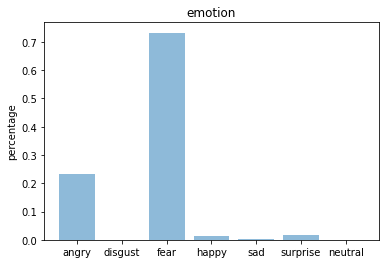

[[2.3420405e-01 2.6087901e-05 7.3231304e-01 1.3436021e-02 1.0899145e-03
  1.8592888e-02 3.3801186e-04]]
0.73231304


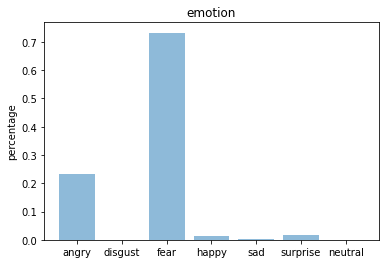

None


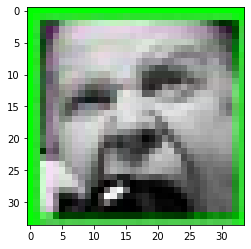

24
Image doesn't exist
25
Image doesn't exist
26
Image doesn't exist
27
Image doesn't exist
28


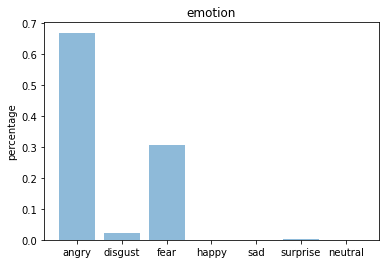

[[6.6784394e-01 2.2872729e-02 3.0585319e-01 7.6132338e-04 4.5752302e-05
  2.3674911e-03 2.5564671e-04]]
0.66784394


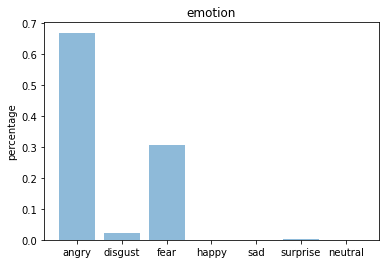

None


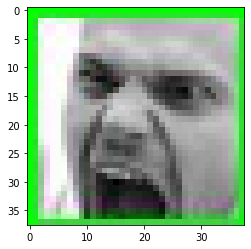

29
Image doesn't exist
30


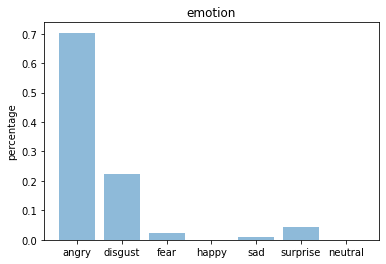

[[7.0332706e-01 2.2348921e-01 2.2399301e-02 1.3456954e-05 8.1737591e-03
  4.2299569e-02 2.9760483e-04]]
0.70332706


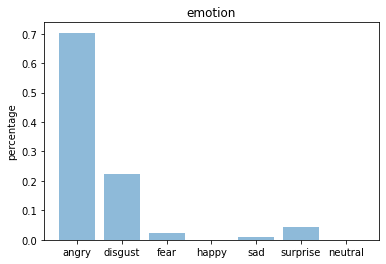

None


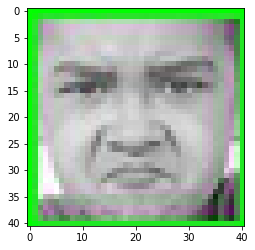

31
Image doesn't exist
32
Image doesn't exist
33
Image doesn't exist
34
Image doesn't exist
35
Image doesn't exist
36
Image doesn't exist
37


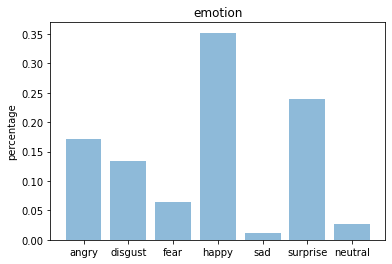

[[0.17170505 0.133862   0.06441849 0.35202032 0.01077627 0.23982434
  0.02739356]]
0.35202032


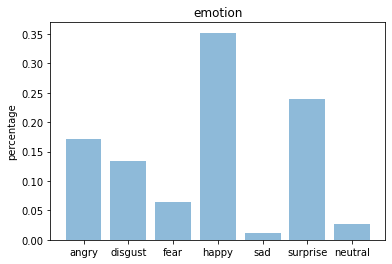

None


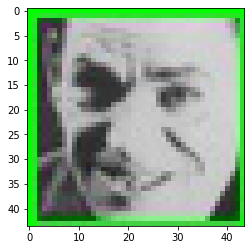

38
Image doesn't exist
39


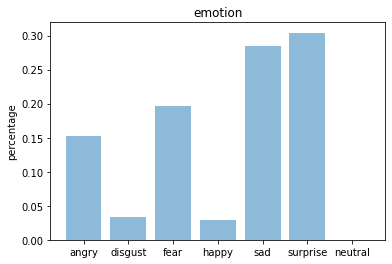

[[1.5276228e-01 3.2878958e-02 1.9597349e-01 2.8878590e-02 2.8501481e-01
  3.0419850e-01 2.9338620e-04]]
0.3041985


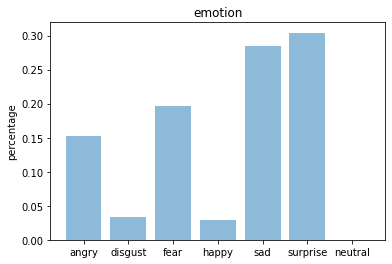

None


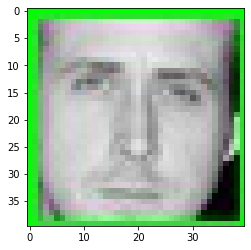

40
Image doesn't exist
41
Image doesn't exist
42
Image doesn't exist
43


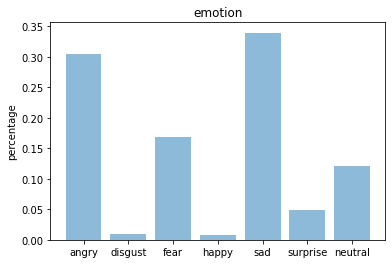

[[0.30464953 0.01009489 0.16790108 0.0073923  0.3394099  0.04943828
  0.12111403]]
0.3394099


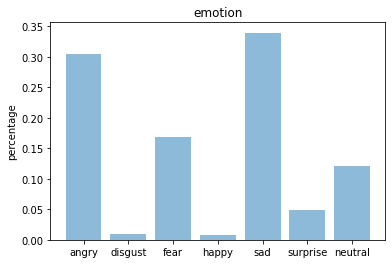

None


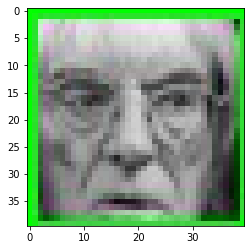

44
Image doesn't exist
45
Image doesn't exist
46


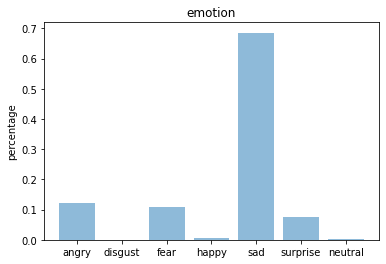

[[1.2246733e-01 3.0325969e-05 1.0926235e-01 4.8194230e-03 6.8581158e-01
  7.4788719e-02 2.8202126e-03]]
0.6858116


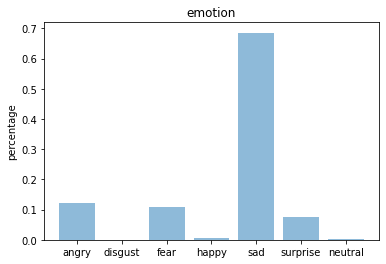

None


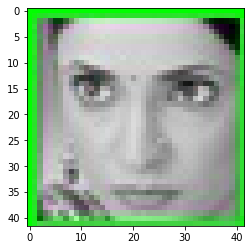

47


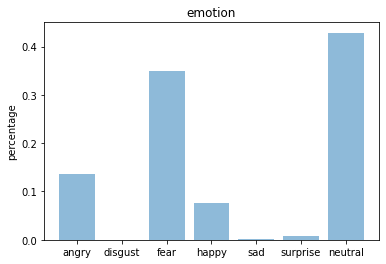

[[1.3679102e-01 3.0500343e-04 3.4916502e-01 7.6379582e-02 1.2645865e-03
  7.4630738e-03 4.2863166e-01]]
0.42863166


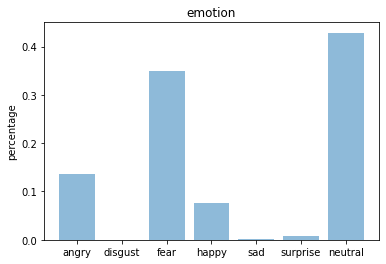

None


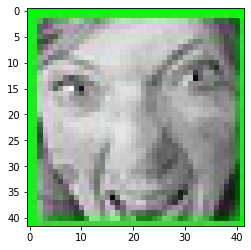

48


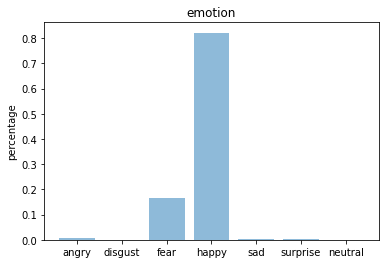

[[6.8851034e-03 6.2365690e-04 1.6648506e-01 8.2155824e-01 2.1621378e-03
  1.8649591e-03 4.2082751e-04]]
0.82155824


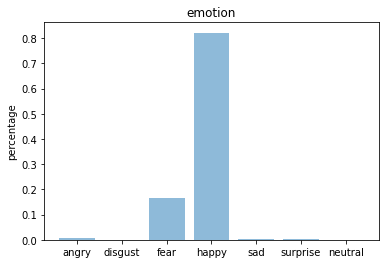

None


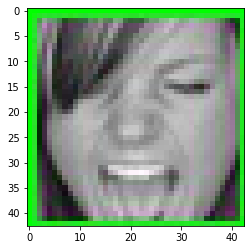

49
Image doesn't exist
50
Image doesn't exist
51


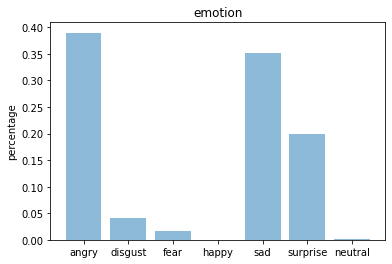

[[3.8974869e-01 4.1837115e-02 1.7292198e-02 1.2681210e-04 3.5156858e-01
  1.9841096e-01 1.0156028e-03]]
0.3897487


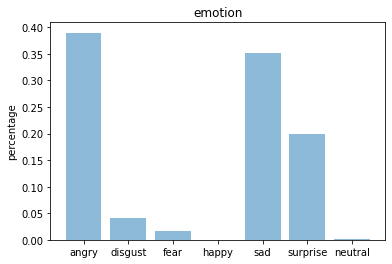

None


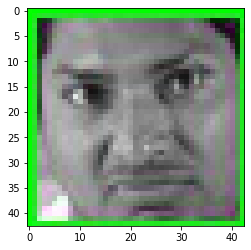

52
Image doesn't exist
53


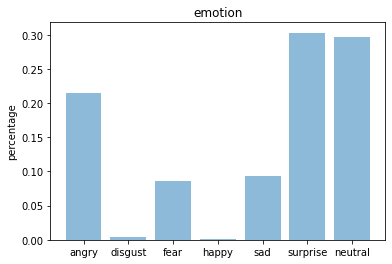

[[0.21459487 0.00439068 0.08579623 0.00114565 0.09374201 0.30294257
  0.29738793]]
0.30294257


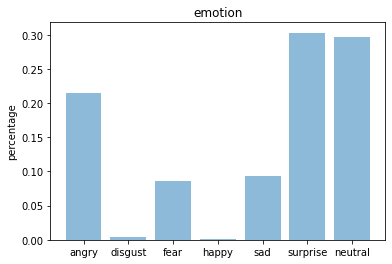

None


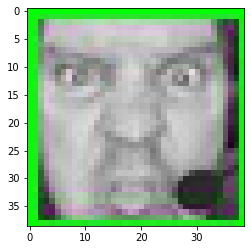

54
Image doesn't exist
55
Image doesn't exist
56


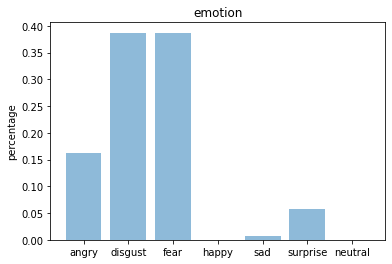

[[1.6263485e-01 3.8623428e-01 3.8707945e-01 3.2488661e-05 6.3661416e-03
  5.7638336e-02 1.4406336e-05]]
0.38707945


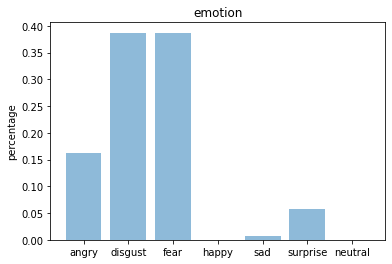

None


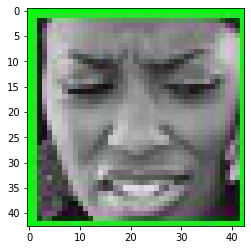

57


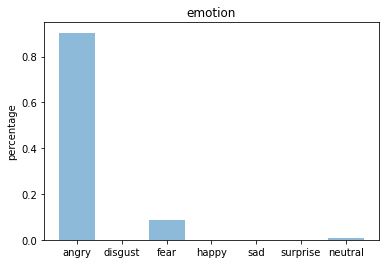

[[9.04485285e-01 3.64455715e-04 8.53798464e-02 1.07174106e-04
  8.73695026e-05 8.21305439e-04 8.75455327e-03]]
0.9044853


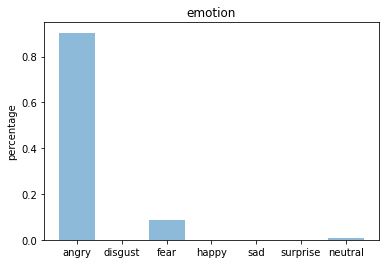

None


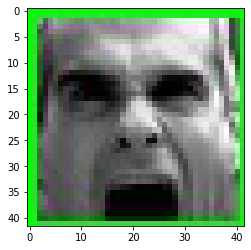

58


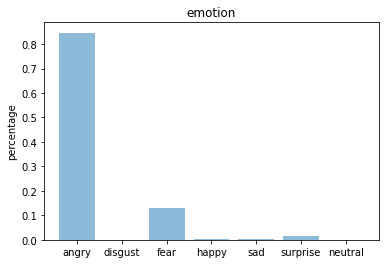

[[8.4634674e-01 2.0826411e-04 1.3096036e-01 2.0646737e-03 3.3807019e-03
  1.7020224e-02 1.9127609e-05]]
0.84634674


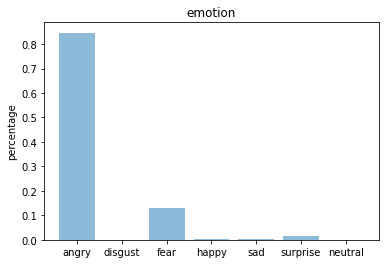

None


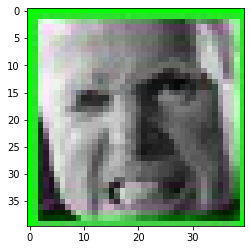

59


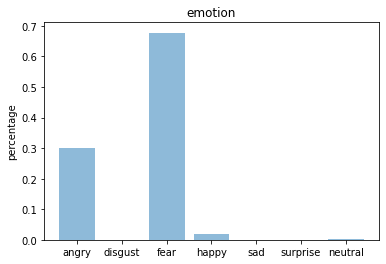

[[2.9974020e-01 1.0046014e-04 6.7782223e-01 1.8898604e-02 7.8634175e-06
  2.3092858e-05 3.4075112e-03]]
0.67782223


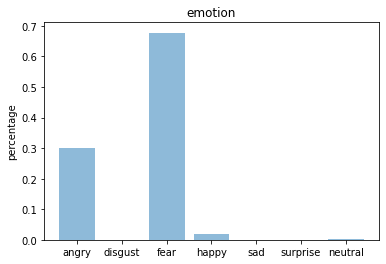

None


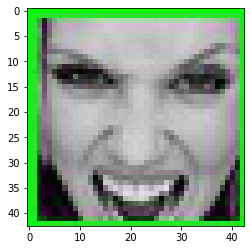

60
Image doesn't exist
61
Image doesn't exist
62


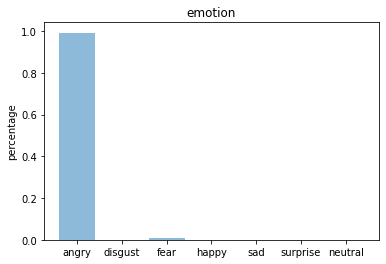

[[9.9215770e-01 4.8739166e-04 6.9955224e-03 5.2719148e-08 1.0307914e-06
  3.5829967e-04 3.4517971e-09]]
0.9921577


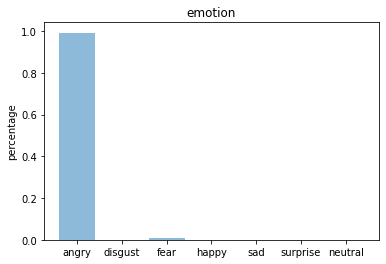

None


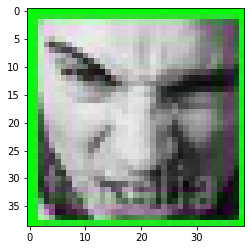

63
Image doesn't exist
64


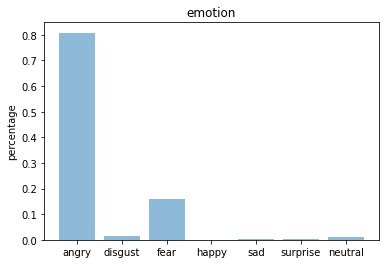

[[8.08258593e-01 1.40928775e-02 1.59687385e-01 2.15292257e-05
  2.48447177e-03 4.71382914e-03 1.07413139e-02]]
0.8082586


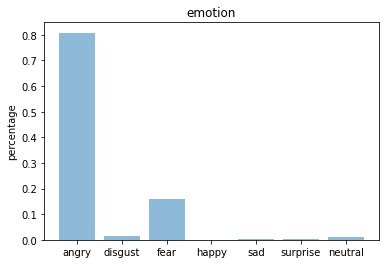

None


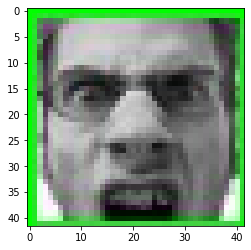

65
Image doesn't exist
66


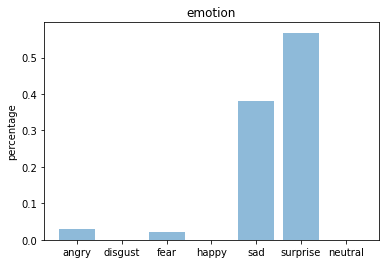

[[2.9160202e-02 4.4740182e-06 2.1066679e-02 7.5475548e-08 3.8119555e-01
  5.6816196e-01 4.1112103e-04]]
0.56816196


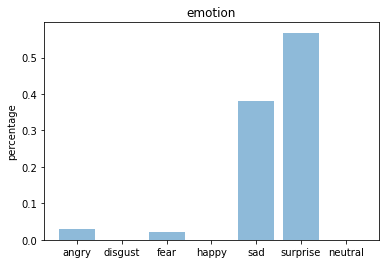

None


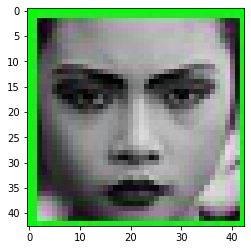

67


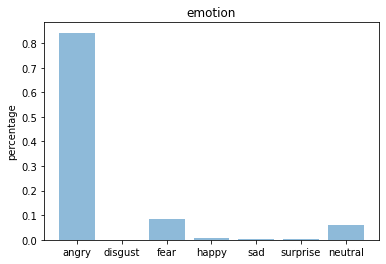

[[8.4261745e-01 1.2706232e-05 8.6634859e-02 6.8140924e-03 2.0485779e-03
  1.5966319e-03 6.0275726e-02]]
0.84261745


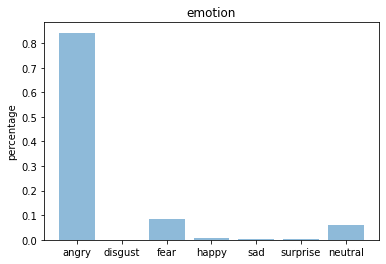

None


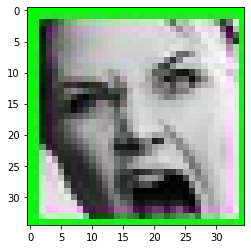

68
Image doesn't exist
69


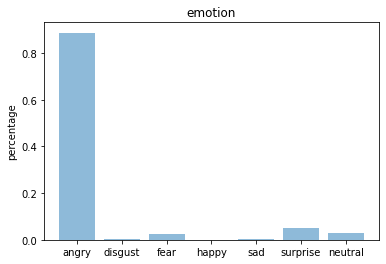

[[0.88715214 0.00235259 0.0268478  0.00092296 0.00196449 0.05082585
  0.0299342 ]]
0.88715214


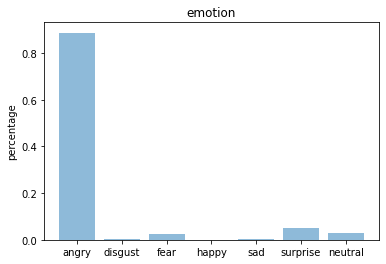

None


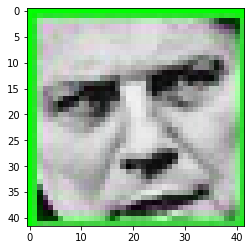

70


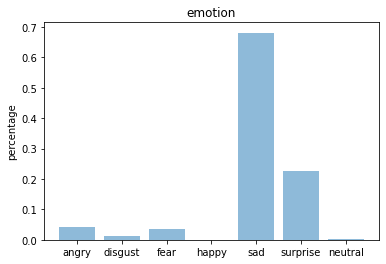

[[4.1761555e-02 1.1160325e-02 3.6995724e-02 2.1627014e-04 6.8150634e-01
  2.2721486e-01 1.1449161e-03]]
0.68150634


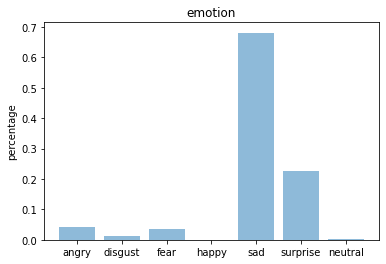

None


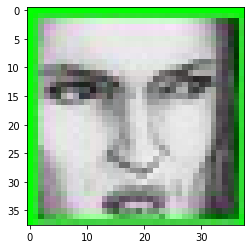

71


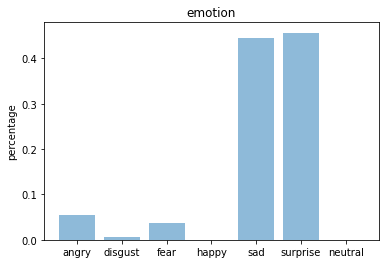

[[5.3810533e-02 5.7363175e-03 3.7118703e-02 3.3787108e-04 4.4611818e-01
  4.5675504e-01 1.2340551e-04]]
0.45675504


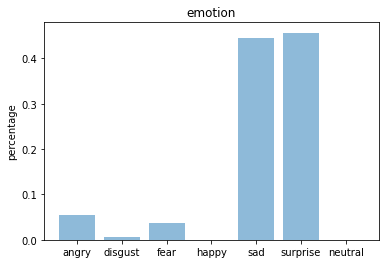

None


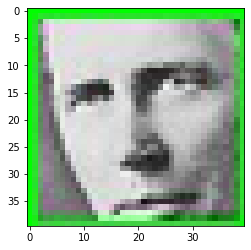

72
Image doesn't exist
73


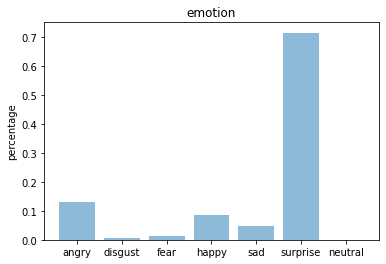

[[1.3023755e-01 6.7176507e-03 1.3826195e-02 8.6765617e-02 4.6049841e-02
  7.1634203e-01 6.1140818e-05]]
0.71634203


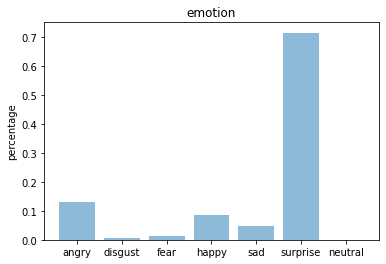

None


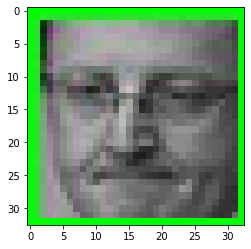

74
Image doesn't exist
75


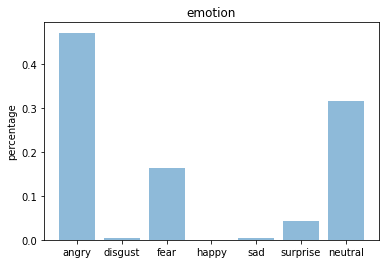

[[4.7100276e-01 3.6555415e-03 1.6286440e-01 1.0659289e-06 4.0014046e-03
  4.2156223e-02 3.1631857e-01]]
0.47100276


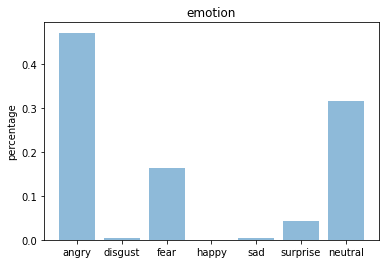

None


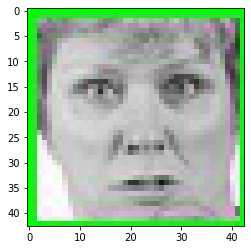

76
Image doesn't exist
77


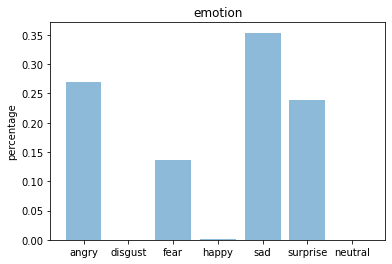

[[2.6879200e-01 3.1518249e-04 1.3676086e-01 9.7766914e-04 3.5370731e-01
  2.3921549e-01 2.3148899e-04]]
0.3537073


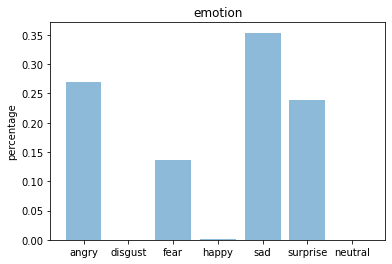

None


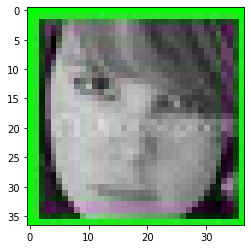

78


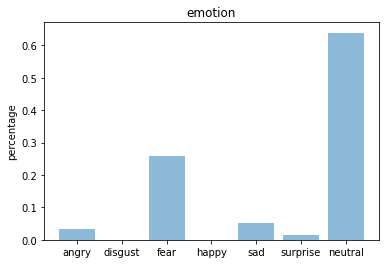

[[3.3378843e-02 2.0452923e-04 2.5807774e-01 2.0072637e-04 5.2583452e-02
  1.6308125e-02 6.3924658e-01]]
0.6392466


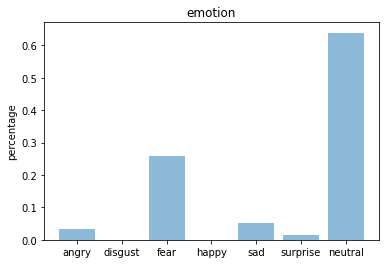

None


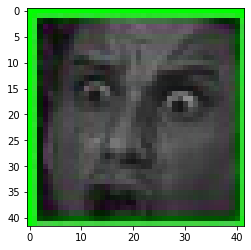

79


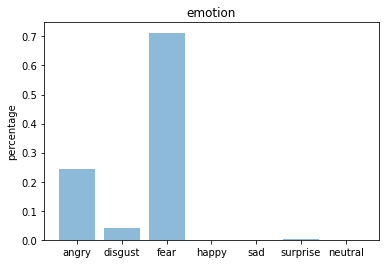

[[2.4354230e-01 4.0412538e-02 7.1275139e-01 4.3607812e-07 1.4131863e-05
  3.2288798e-03 5.0285769e-05]]
0.7127514


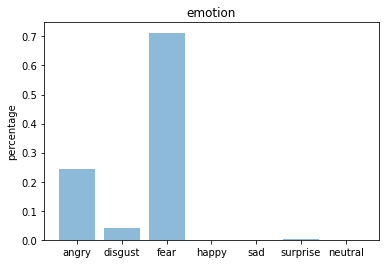

None


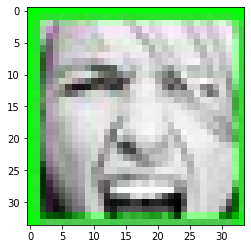

80
Image doesn't exist
81
Image doesn't exist
82


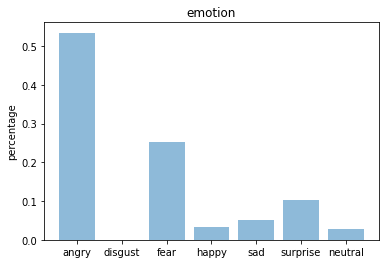

[[0.5346349  0.00061631 0.253381   0.03201026 0.05078915 0.10153998
  0.02702839]]
0.5346349


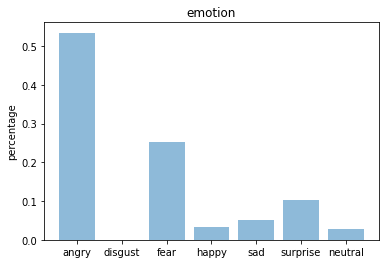

None


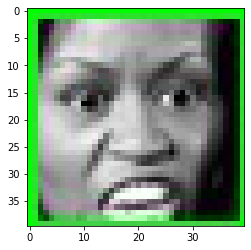

83
Image doesn't exist
84


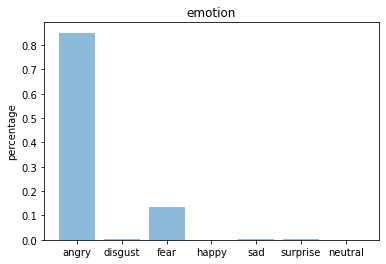

[[8.5056061e-01 5.1501337e-03 1.3523570e-01 3.7501659e-04 5.1733633e-03
  2.4445804e-03 1.0606805e-03]]
0.8505606


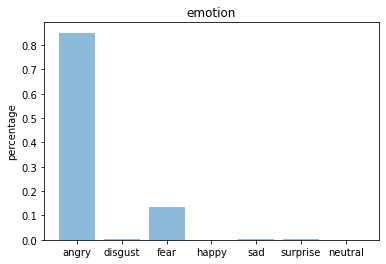

None


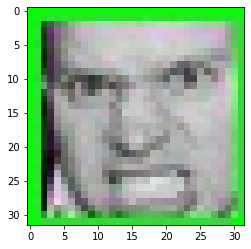

85
Image doesn't exist
86


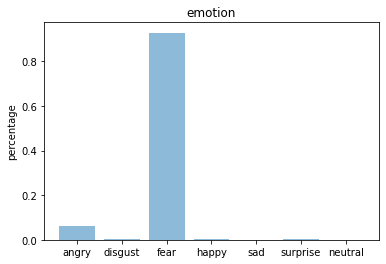

[[6.1749648e-02 3.2162175e-03 9.2860079e-01 3.9669690e-03 8.7866554e-04
  1.4976804e-03 9.0007190e-05]]
0.9286008


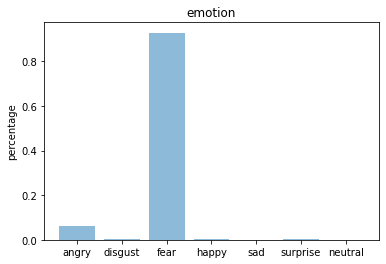

None


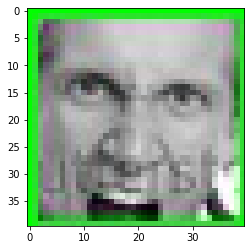

87


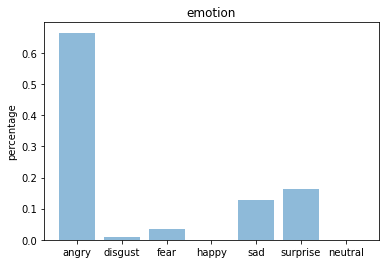

[[6.6482460e-01 7.4273879e-03 3.6018182e-02 3.8445494e-04 1.2905918e-01
  1.6225034e-01 3.5865552e-05]]
0.6648246


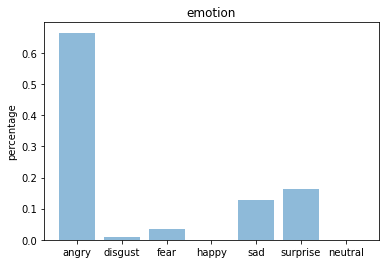

None


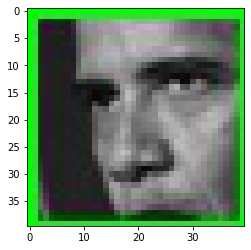

88
Image doesn't exist
89
Image doesn't exist
90


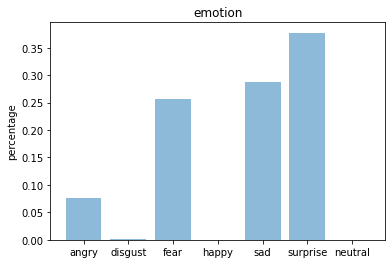

[[7.5258747e-02 1.8114023e-03 2.5692239e-01 4.0124869e-05 2.8838068e-01
  3.7731233e-01 2.7433754e-04]]
0.37731233


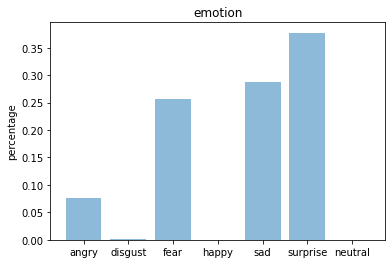

None


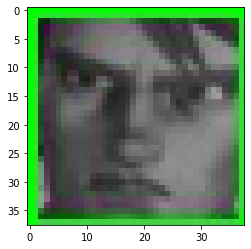

91


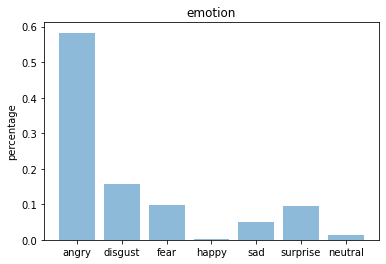

[[0.582832   0.15667564 0.09873363 0.00138445 0.05077366 0.0950353
  0.01456529]]
0.582832


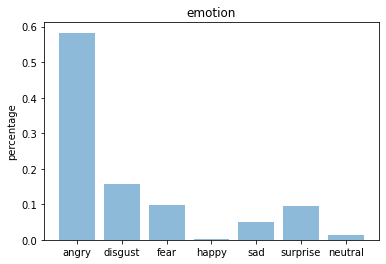

None


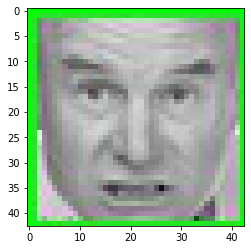

92
Image doesn't exist
93


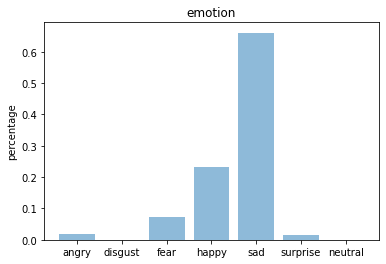

[[1.8586168e-02 1.9199401e-04 7.2312832e-02 2.3255156e-01 6.6102701e-01
  1.5310229e-02 2.0142848e-05]]
0.661027


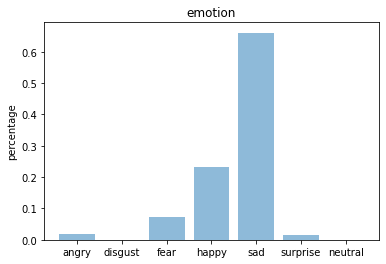

None


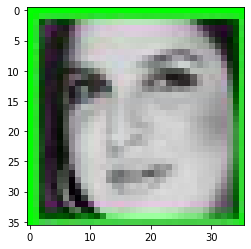

94


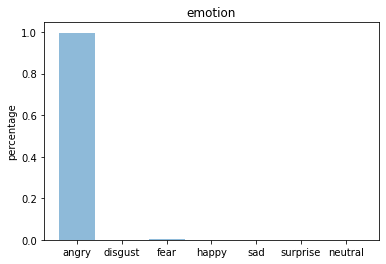

[[9.9681050e-01 3.3011098e-04 2.6586936e-03 2.7605845e-05 9.9857334e-07
  1.0819691e-05 1.6136651e-04]]
0.9968105


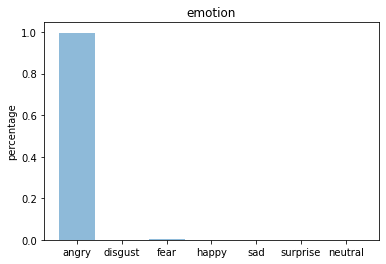

None


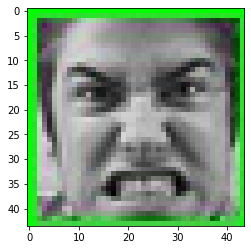

95


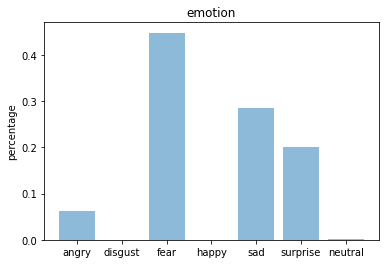

[[6.2855147e-02 2.3392966e-04 4.4864902e-01 1.8710598e-04 2.8640825e-01
  2.0026183e-01 1.4047170e-03]]
0.44864902


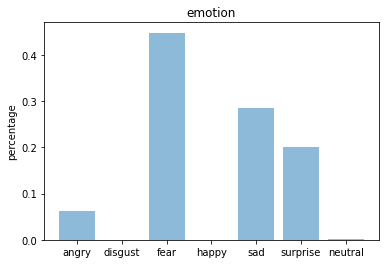

None


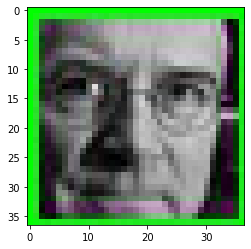

96


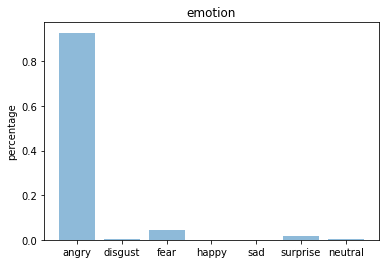

[[9.2900866e-01 3.8269162e-03 4.5364346e-02 1.3349648e-03 5.8750971e-04
  1.8421445e-02 1.4561585e-03]]
0.92900866


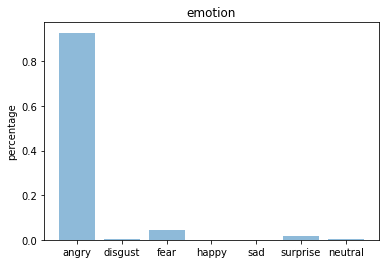

None


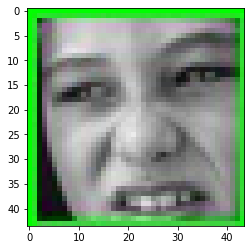

97


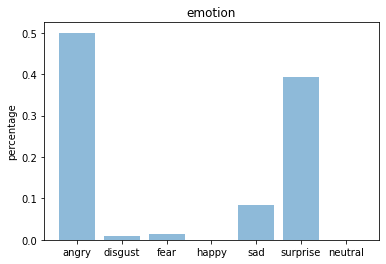

[[4.9995637e-01 8.9920117e-03 1.3830879e-02 3.2383083e-05 8.5178696e-02
  3.9197728e-01 3.2332413e-05]]
0.49995637


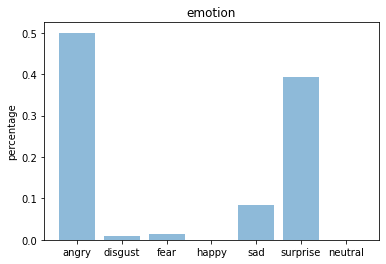

None


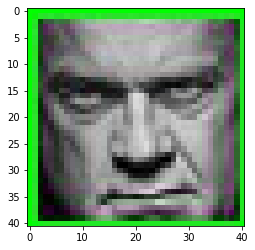

98


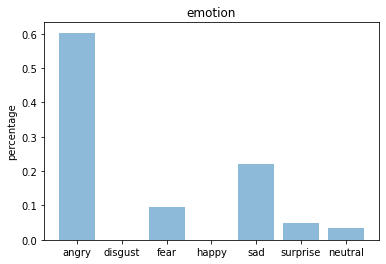

[[6.0279554e-01 5.5861205e-04 9.4872415e-02 1.5589007e-04 2.1971041e-01
  4.8314061e-02 3.3593073e-02]]
0.60279554


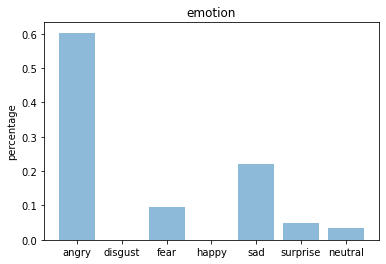

None


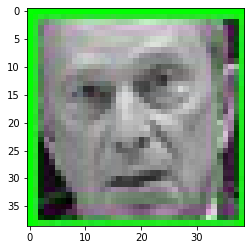

99
Image doesn't exist
100
Image doesn't exist
101
Image doesn't exist
102
Image doesn't exist
103


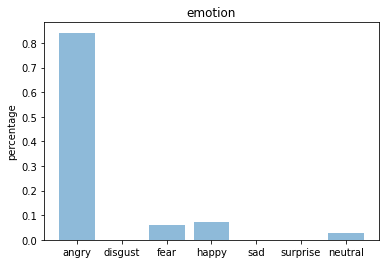

[[8.41400981e-01 1.01914135e-04 5.96199483e-02 7.04974160e-02
  3.83179795e-05 1.66787679e-04 2.81745456e-02]]
0.841401


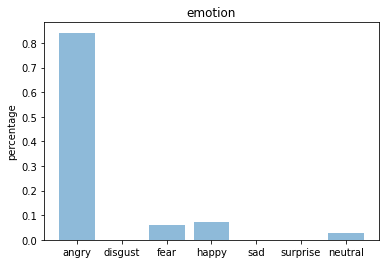

None


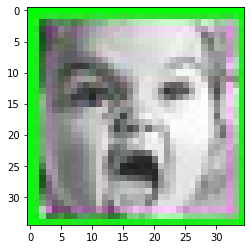

104
Image doesn't exist
105


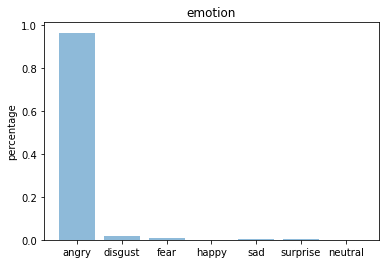

[[9.65275288e-01 1.84539575e-02 1.02356216e-02 1.12218266e-04
  1.97716709e-03 3.63176339e-03 3.13956465e-04]]
0.9652753


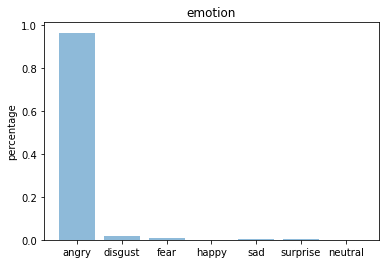

None


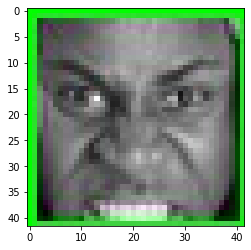

106
Image doesn't exist
107
Image doesn't exist
108
Image doesn't exist
109


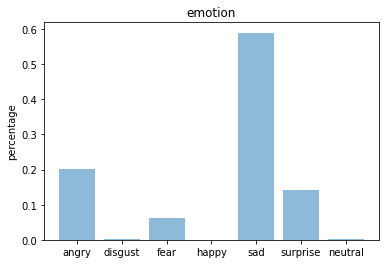

[[2.0253985e-01 2.5772813e-03 6.1603311e-02 4.6502886e-04 5.8954626e-01
  1.4039414e-01 2.8741644e-03]]
0.58954626


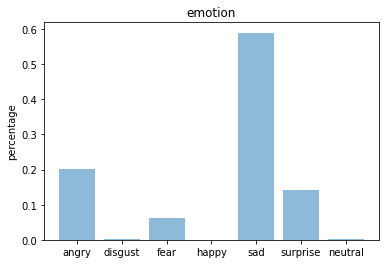

None


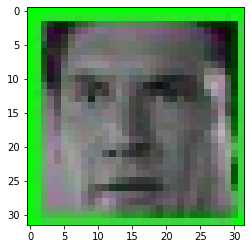

110
Image doesn't exist
111


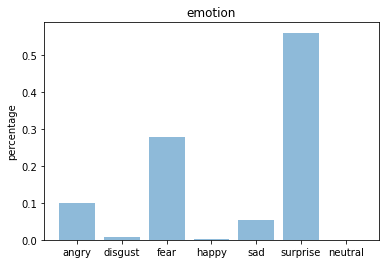

[[9.9940300e-02 6.6448785e-03 2.7761155e-01 9.8408002e-04 5.4615200e-02
  5.5992889e-01 2.7512814e-04]]
0.5599289


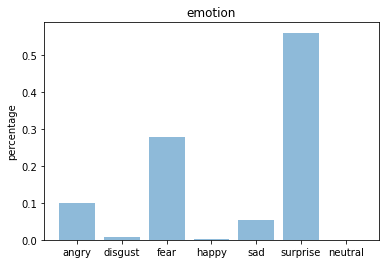

None


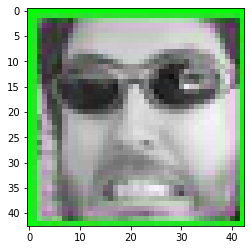

112
Image doesn't exist
113


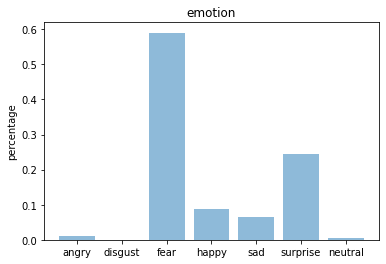

[[1.0751537e-02 2.2868744e-06 5.9018552e-01 8.7427765e-02 6.3945219e-02
  2.4351628e-01 4.1713309e-03]]
0.5901855


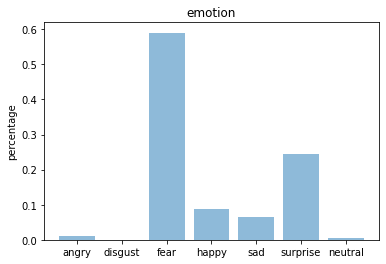

None


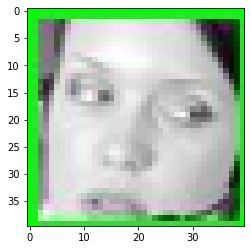

114


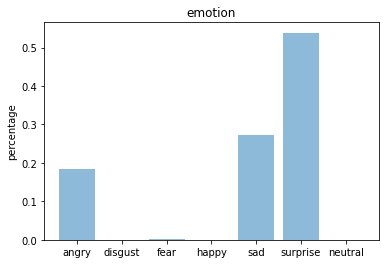

[[1.8472871e-01 3.8783459e-04 2.0099515e-03 3.0995677e-06 2.7352759e-01
  5.3870231e-01 6.4050528e-04]]
0.5387023


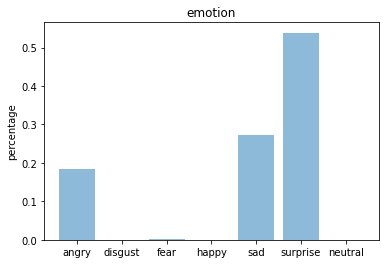

None


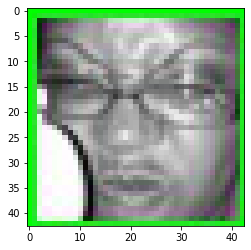

115
Image doesn't exist
116
Image doesn't exist
117
Image doesn't exist
118


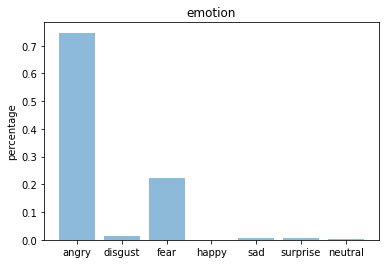

[[7.4705458e-01 1.3945434e-02 2.2189845e-01 3.4478002e-05 8.2357628e-03
  7.4065332e-03 1.4246851e-03]]
0.7470546


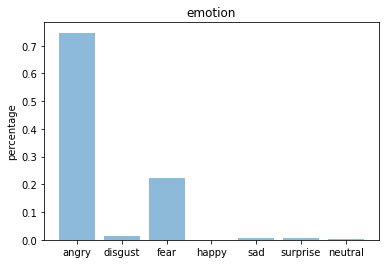

None


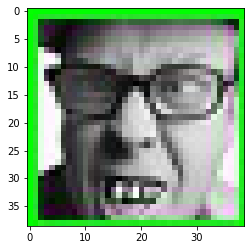

119
Image doesn't exist
120
Image doesn't exist
121


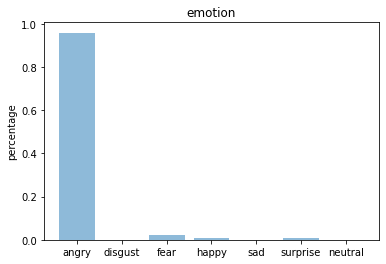

[[9.5833784e-01 1.6451650e-04 2.4428915e-02 1.0408414e-02 2.7283712e-04
  6.2054913e-03 1.8197262e-04]]
0.95833784


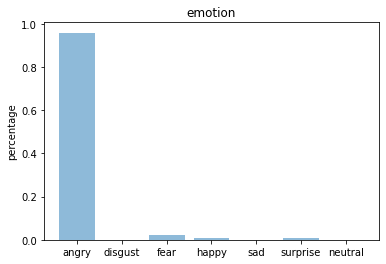

None


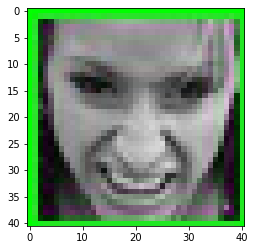

122
Image doesn't exist
123


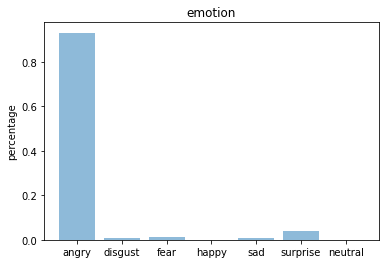

[[9.3075830e-01 7.6277745e-03 1.1246928e-02 5.8984386e-07 8.7383837e-03
  4.1601539e-02 2.6442649e-05]]
0.9307583


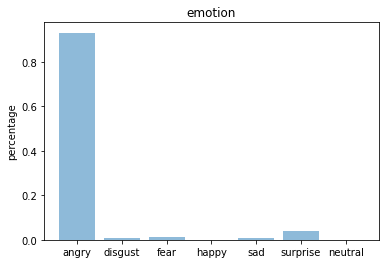

None


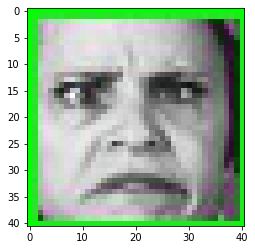

124


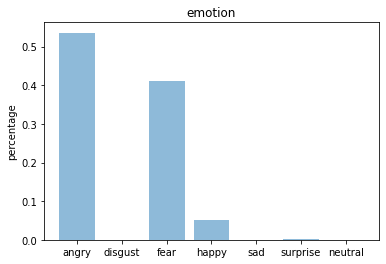

[[5.3609270e-01 1.3341181e-05 4.1055426e-01 5.0060373e-02 6.2152353e-04
  2.1536751e-03 5.0416793e-04]]
0.5360927


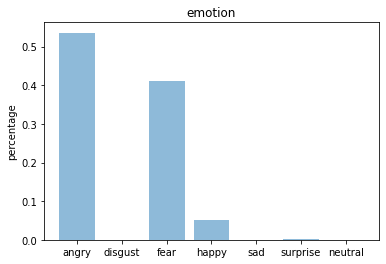

None


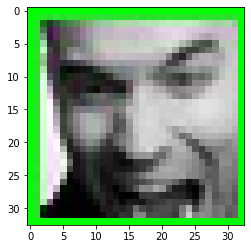

125


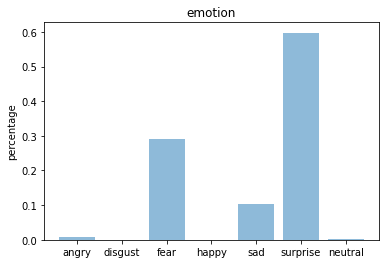

[[7.32616521e-03 3.66760432e-05 2.90045083e-01 3.39299324e-04
  1.03049666e-01 5.97544074e-01 1.65906199e-03]]
0.5975441


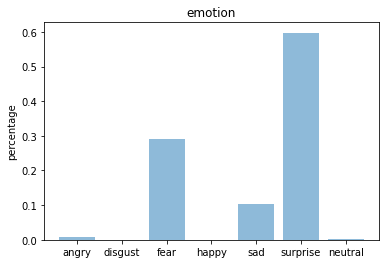

None


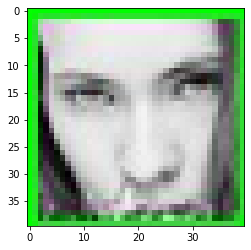

126
Image doesn't exist
127
Image doesn't exist
128


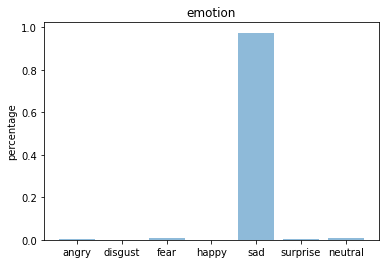

[[4.3927310e-03 1.9701080e-05 1.0344615e-02 1.3661488e-05 9.7383797e-01
  2.8108156e-03 8.5805971e-03]]
0.973838


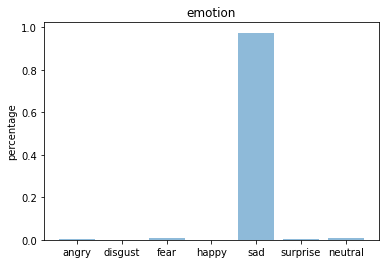

None


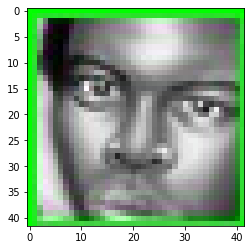

129


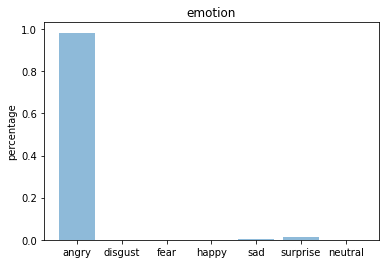

[[9.8266011e-01 3.1686248e-04 7.4901490e-04 3.7781618e-07 4.5721130e-03
  1.1701388e-02 1.4871345e-07]]
0.9826601


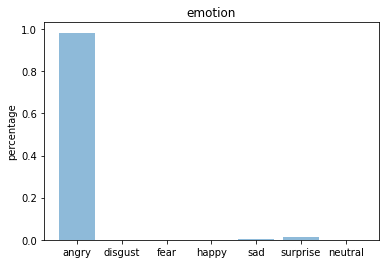

None


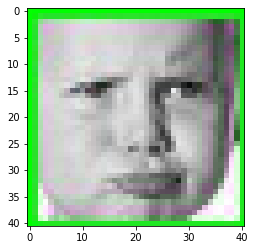

130
Image doesn't exist
131
Image doesn't exist
132
Image doesn't exist
133
Image doesn't exist
134
Image doesn't exist
135


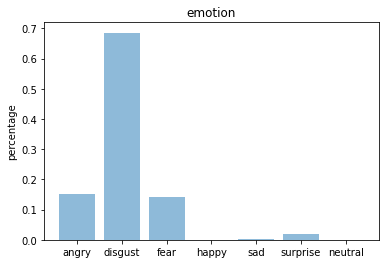

[[1.5096219e-01 6.8587559e-01 1.4159290e-01 2.2511413e-06 3.5577731e-03
  1.7995629e-02 1.3749571e-05]]
0.6858756


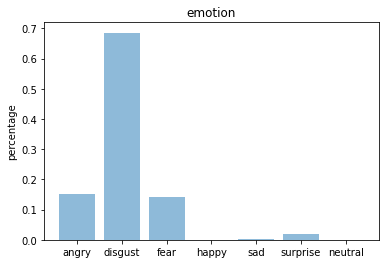

None


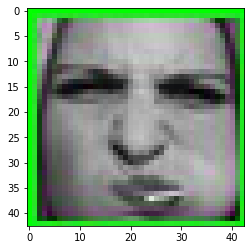

136


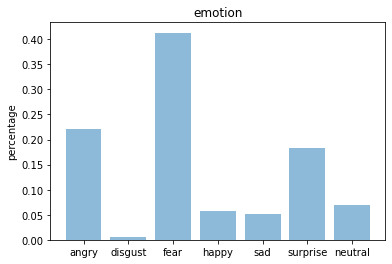

[[0.22074889 0.0051419  0.41311064 0.0568436  0.05241631 0.18232982
  0.0694089 ]]
0.41311064


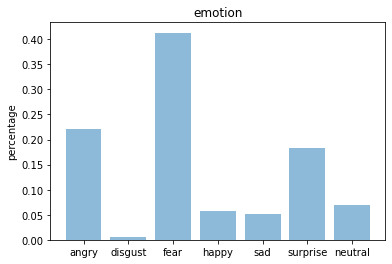

None


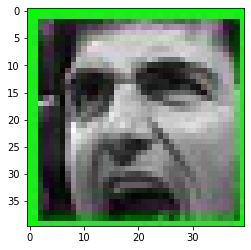

137
Image doesn't exist
138
Image doesn't exist
139


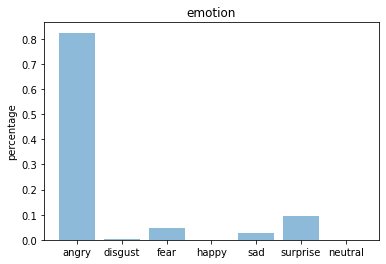

[[8.2389623e-01 5.0446875e-03 4.7827870e-02 2.7491886e-05 2.8653035e-02
  9.4480999e-02 6.9694666e-05]]
0.8238962


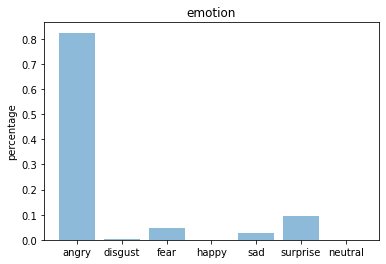

None


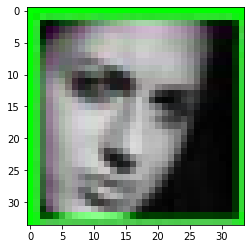

140


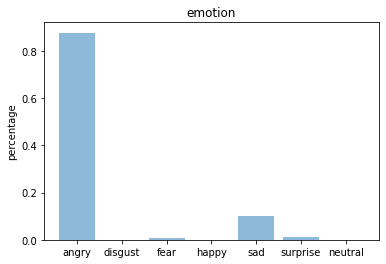

[[8.7638873e-01 6.4998108e-05 8.2651917e-03 1.9744177e-05 1.0230812e-01
  1.2043246e-02 9.0996310e-04]]
0.8763887


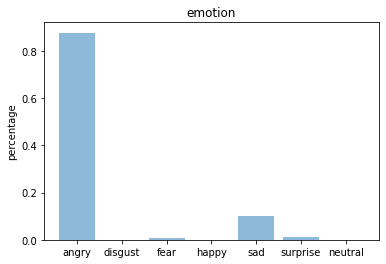

None


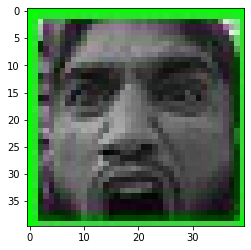

141


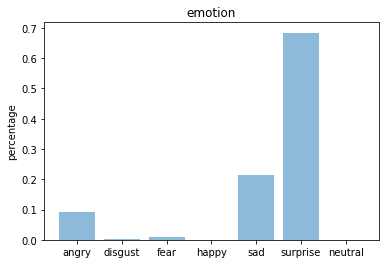

[[9.0359740e-02 2.6219729e-03 1.0654978e-02 3.2622172e-08 2.1238600e-01
  6.8396759e-01 9.7086067e-06]]
0.6839676


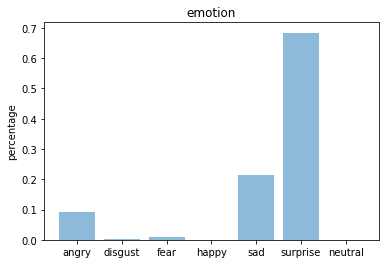

None


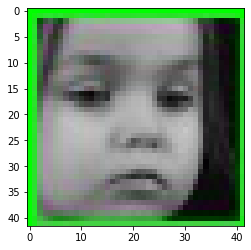

142
Image doesn't exist
143
Image doesn't exist
144


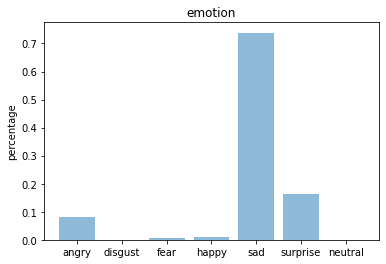

[[8.2309105e-02 8.5284482e-06 4.6915850e-03 9.4534364e-03 7.3830289e-01
  1.6451770e-01 7.1679009e-04]]
0.7383029


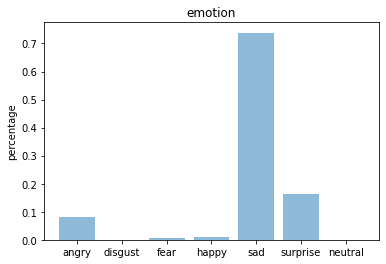

None


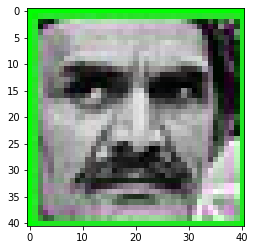

145
Image doesn't exist
146
Image doesn't exist
147


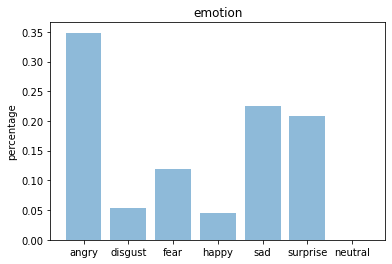

[[3.4846172e-01 5.4117721e-02 1.1895461e-01 4.4612493e-02 2.2491150e-01
  2.0873038e-01 2.1161136e-04]]
0.34846172


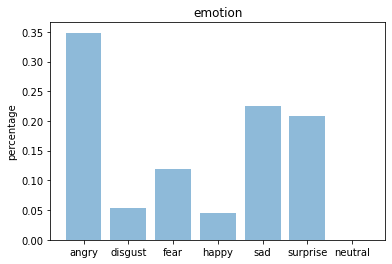

None


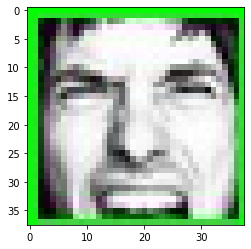

148
Image doesn't exist
149


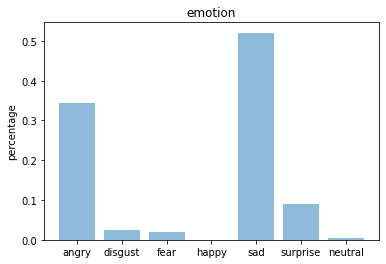

[[3.4277210e-01 2.4266439e-02 1.8665057e-02 4.1522522e-05 5.2059114e-01
  8.9502744e-02 4.1610249e-03]]
0.52059114


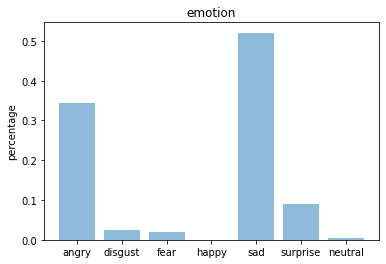

None


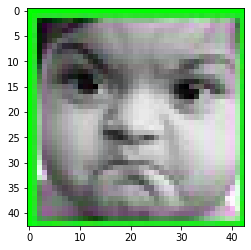

150
Image doesn't exist
151
Image doesn't exist
152
Image doesn't exist
153
Image doesn't exist
154


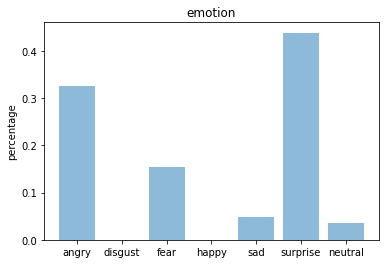

[[3.2467780e-01 1.9828840e-05 1.5316142e-01 4.6121728e-05 4.9214970e-02
  4.3826470e-01 3.4615185e-02]]
0.4382647


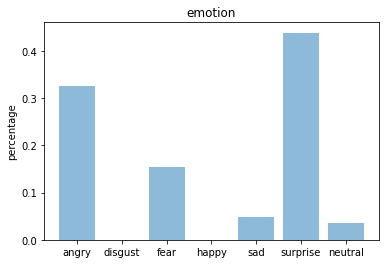

None


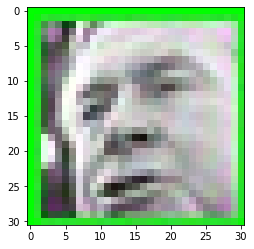

155
Image doesn't exist
156


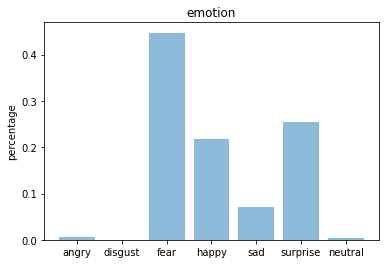

[[6.9274795e-03 2.5970058e-04 4.4727063e-01 2.1744305e-01 7.0406377e-02
  2.5398996e-01 3.7028303e-03]]
0.44727063


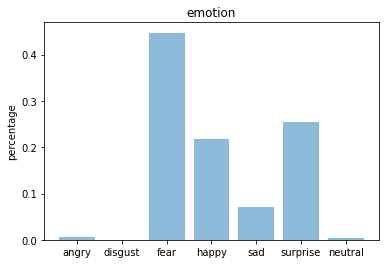

None


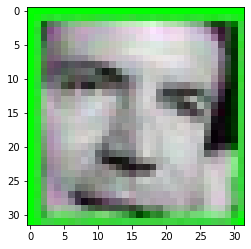

157
Image doesn't exist
158
Image doesn't exist
159


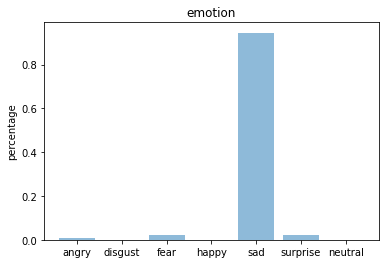

[[9.9587739e-03 1.7013073e-04 2.1392316e-02 7.6661694e-05 9.4535375e-01
  2.2796407e-02 2.5193064e-04]]
0.94535375


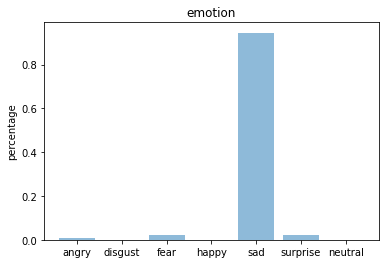

None


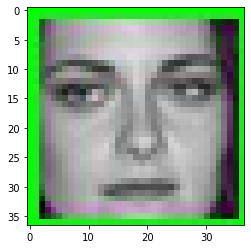

160
Image doesn't exist
161
Image doesn't exist
162
Image doesn't exist
163


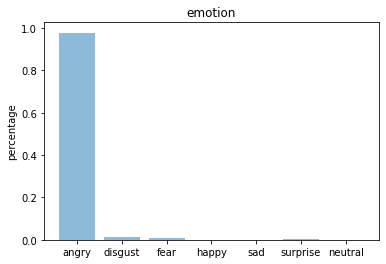

[[9.7789180e-01 1.1117314e-02 8.2371440e-03 1.3562108e-08 5.2092236e-04
  2.1983068e-03 3.4621313e-05]]
0.9778918


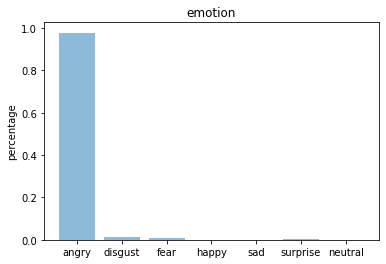

None


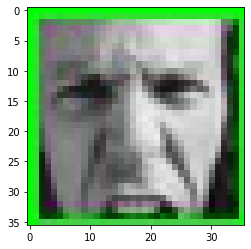

164


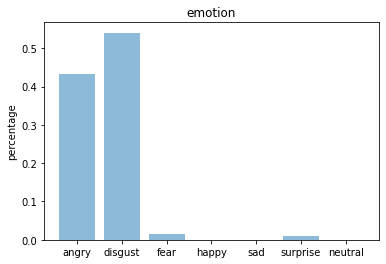

[[4.3298542e-01 5.4067183e-01 1.6232343e-02 6.7833762e-06 4.4893935e-05
  1.0057650e-02 1.0818649e-06]]
0.5406718


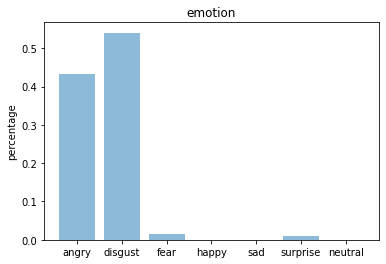

None


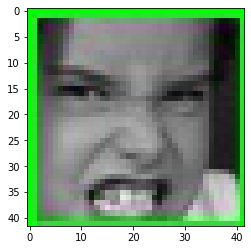

165
Image doesn't exist
166
Image doesn't exist
167
Image doesn't exist
168
Image doesn't exist
169
Image doesn't exist
170
Image doesn't exist
171
Image doesn't exist
172
Image doesn't exist
173


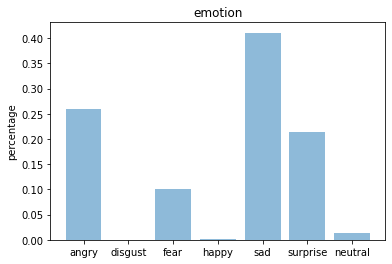

[[2.59232461e-01 3.51599127e-04 1.01557955e-01 9.29445436e-04
  4.10955429e-01 2.13763908e-01 1.32092424e-02]]
0.41095543


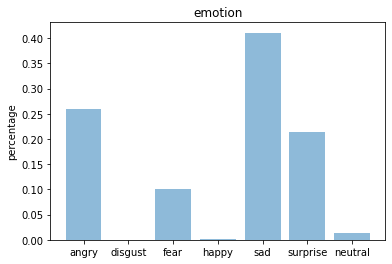

None


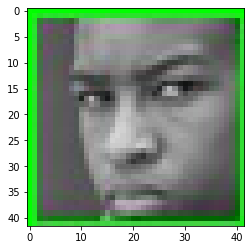

174
Image doesn't exist
175
Image doesn't exist
176
Image doesn't exist
177
Image doesn't exist
178


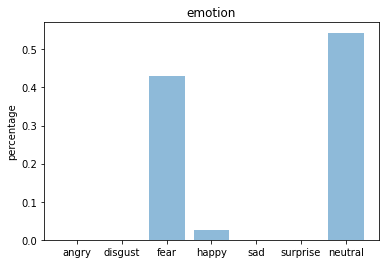

[[9.4408142e-06 3.4069894e-09 4.3097460e-01 2.5133690e-02 2.9698315e-06
  2.4077579e-04 5.4363853e-01]]
0.5436385


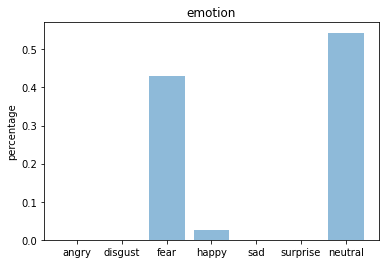

None


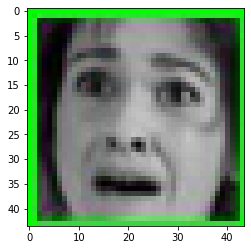

179
Image doesn't exist
180
Image doesn't exist
181
Image doesn't exist
182


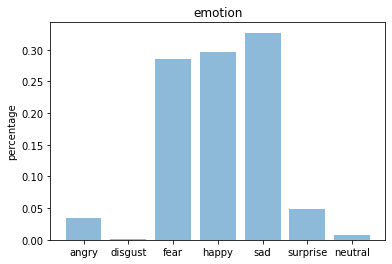

[[0.03406524 0.00169365 0.28474018 0.29620564 0.3269675  0.04928977
  0.00703806]]
0.3269675


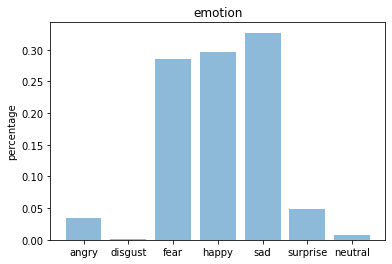

None


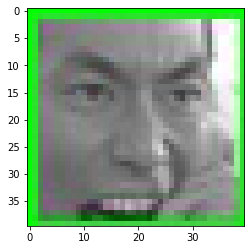

183
Image doesn't exist
184
Image doesn't exist
185
Image doesn't exist
186


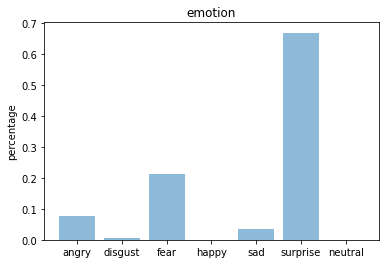

[[7.8443490e-02 5.7300385e-03 2.1235211e-01 1.6764656e-05 3.3933140e-02
  6.6951919e-01 5.2022078e-06]]
0.6695192


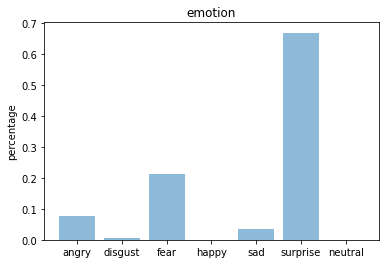

None


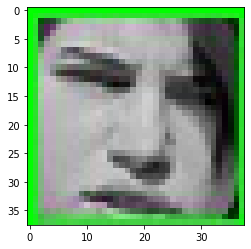

187
Image doesn't exist
188
Image doesn't exist
189
Image doesn't exist
190
Image doesn't exist
191


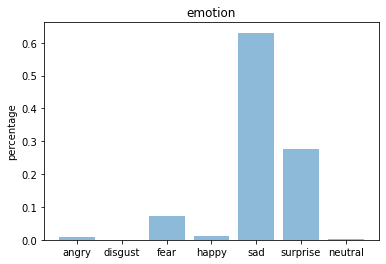

[[7.0879236e-03 2.2713443e-04 7.1907625e-02 1.0763546e-02 6.3059729e-01
  2.7557912e-01 3.8373780e-03]]
0.6305973


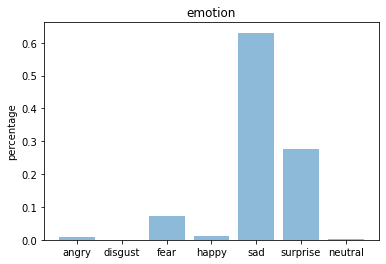

None


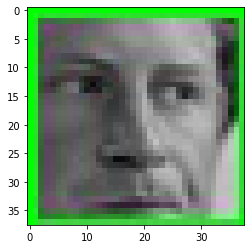

192


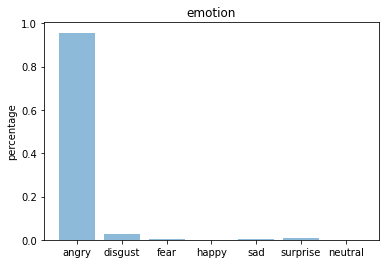

[[9.5670569e-01 2.7802108e-02 5.2625583e-03 3.5500914e-05 1.5251030e-03
  8.6114397e-03 5.7487163e-05]]
0.9567057


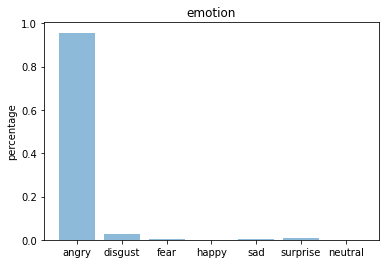

None


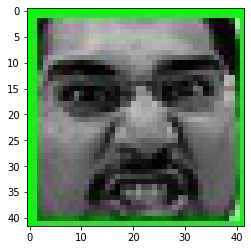

193
Image doesn't exist
194
Image doesn't exist
195
Image doesn't exist
196


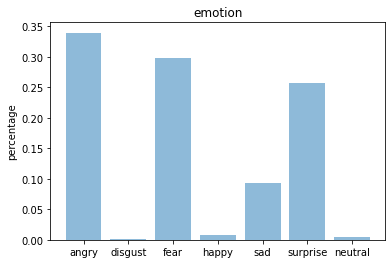

[[0.33968192 0.00060566 0.29798666 0.00716771 0.09384871 0.25668496
  0.00402437]]
0.33968192


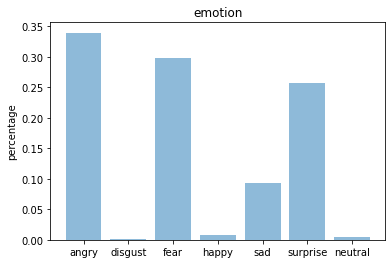

None


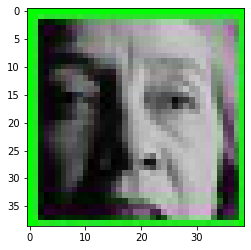

197


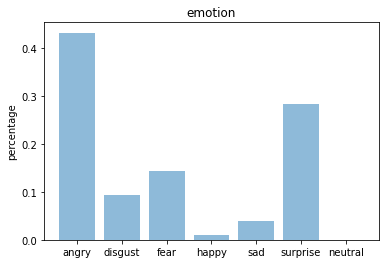

[[4.3196899e-01 9.2988178e-02 1.4333510e-01 9.8640276e-03 3.8352508e-02
  2.8317472e-01 3.1647633e-04]]
0.431969


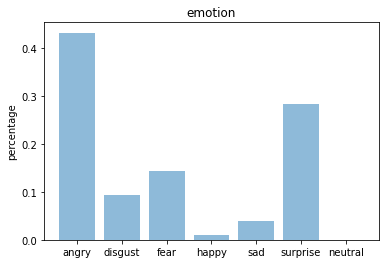

None


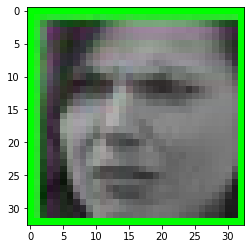

198
Image doesn't exist
199
Image doesn't exist
200
Image doesn't exist
201
Image doesn't exist
202
Image doesn't exist
203
Image doesn't exist
204
Image doesn't exist
205
Image doesn't exist
206


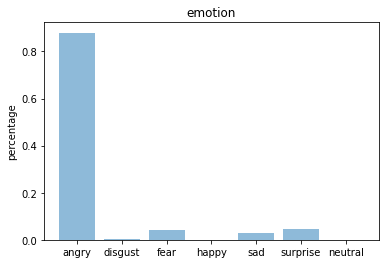

[[8.7935483e-01 5.5053160e-03 4.0483546e-02 1.2235533e-04 2.9339654e-02
  4.4615857e-02 5.7846389e-04]]
0.87935483


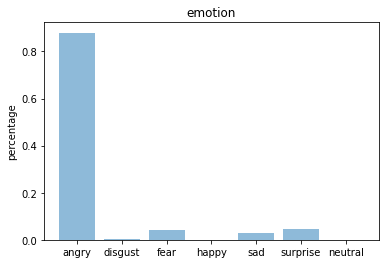

None


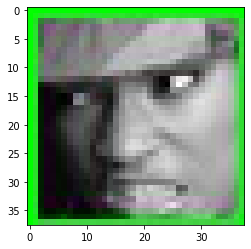

207
Image doesn't exist
208
Image doesn't exist
209


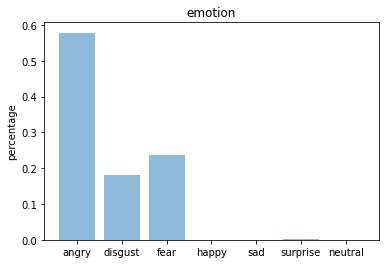

[[5.7861245e-01 1.8143120e-01 2.3825955e-01 1.6749395e-06 3.5007755e-04
  1.3327244e-03 1.2259713e-05]]
0.57861245


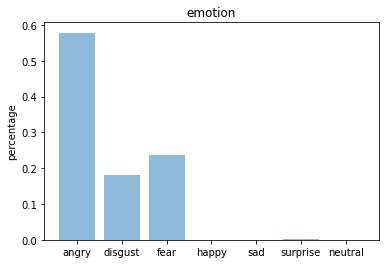

None


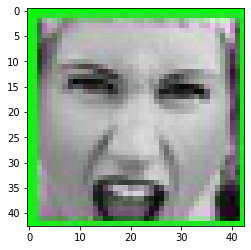

210


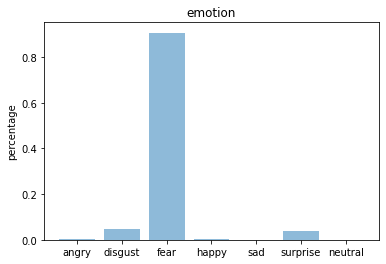

[[3.6307303e-03 4.7440302e-02 9.0646768e-01 1.8085232e-03 4.9697026e-04
  4.0086236e-02 6.9641806e-05]]
0.9064677


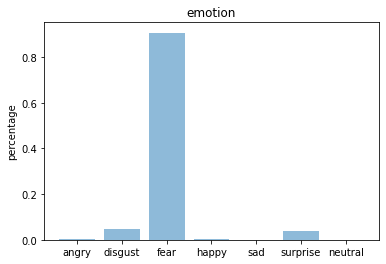

None


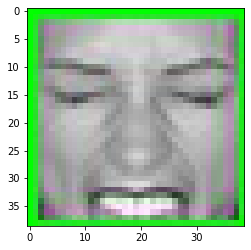

211
Image doesn't exist
212
Image doesn't exist
213
Image doesn't exist
214


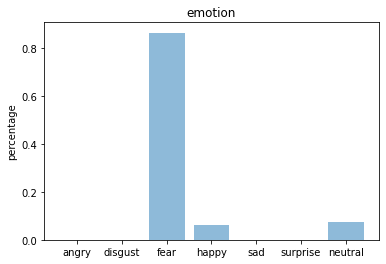

[[1.1825211e-03 3.2282158e-04 8.6353290e-01 5.9983809e-02 1.6989477e-05
  1.1203601e-03 7.3840678e-02]]
0.8635329


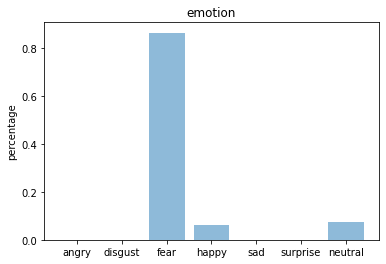

None


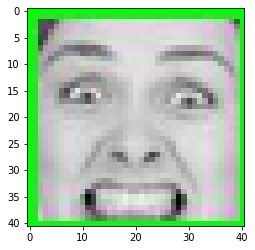

215


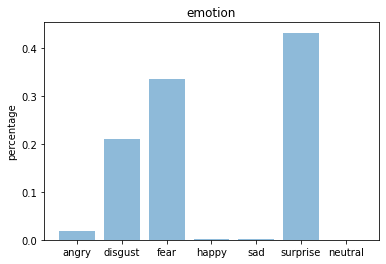

[[0.01885163 0.21084842 0.33543816 0.00081929 0.00209841 0.43149748
  0.00044657]]
0.43149748


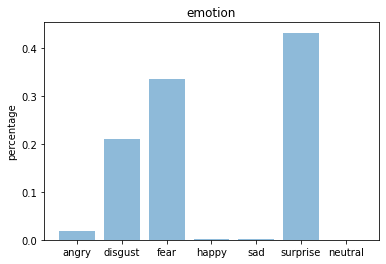

None


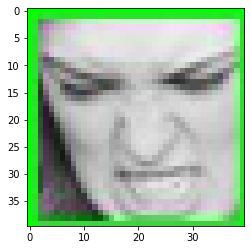

216
Image doesn't exist
217


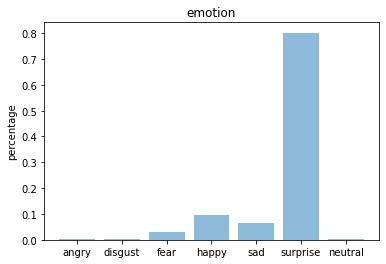

[[0.00266844 0.00367485 0.03066762 0.09571313 0.06394945 0.8018547
  0.00147173]]
0.8018547


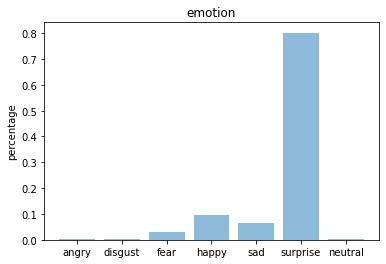

None


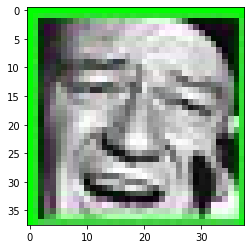

218
Image doesn't exist
219
Image doesn't exist
220
Image doesn't exist
221
Image doesn't exist
222


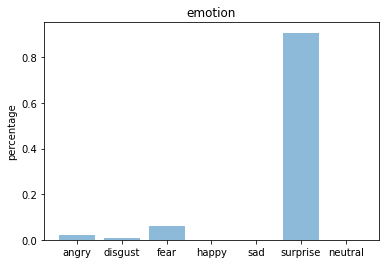

[[2.3240842e-02 6.9039571e-03 6.1229371e-02 1.3768655e-05 1.2600167e-04
  9.0848529e-01 7.4451094e-07]]
0.9084853


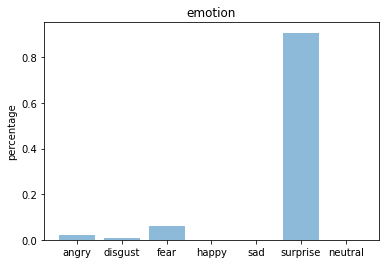

None


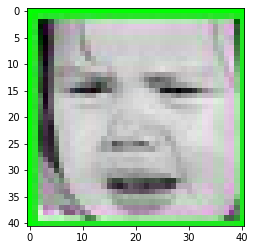

223
Image doesn't exist
224


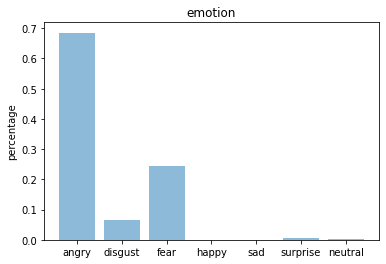

[[6.8517298e-01 6.4921953e-02 2.4287134e-01 5.2034709e-05 3.3068983e-04
  5.4464680e-03 1.2045578e-03]]
0.685173


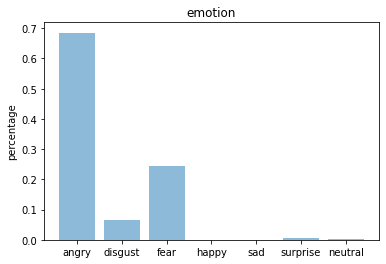

None


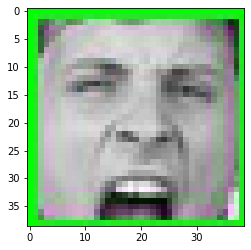

225
Image doesn't exist
226


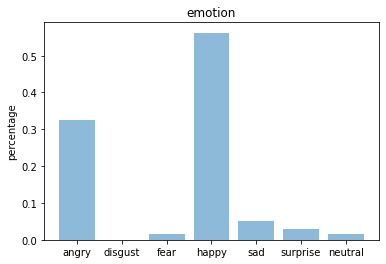

[[3.2543218e-01 4.5758465e-05 1.5570264e-02 5.6232268e-01 5.1749229e-02
  2.8946703e-02 1.5933149e-02]]
0.5623227


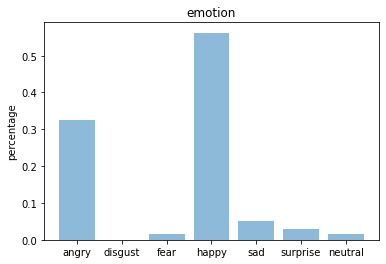

None


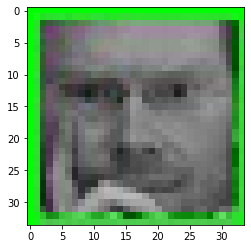

227


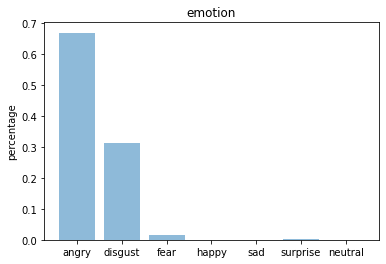

[[6.6969150e-01 3.1174347e-01 1.5736029e-02 5.3537075e-08 2.7692508e-05
  2.8012728e-03 2.5197597e-08]]
0.6696915


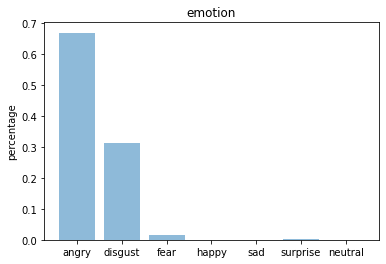

None


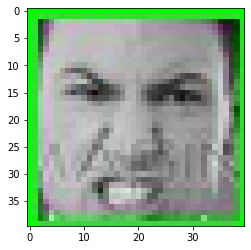

228


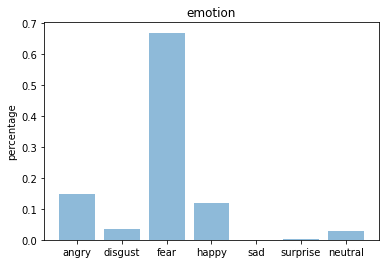

[[1.49152547e-01 3.51393819e-02 6.67726398e-01 1.18929826e-01
  2.86056329e-05 1.79160468e-03 2.72316355e-02]]
0.6677264


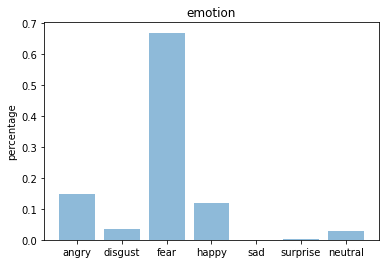

None


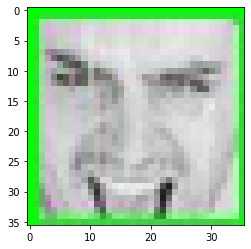

229


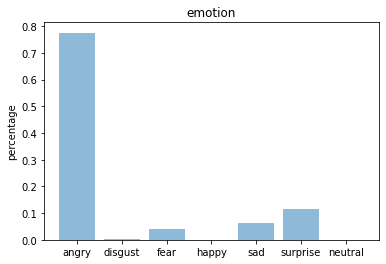

[[7.7541703e-01 1.2171851e-03 4.1978002e-02 8.4767432e-04 6.4518057e-02
  1.1593699e-01 8.5043583e-05]]
0.77541703


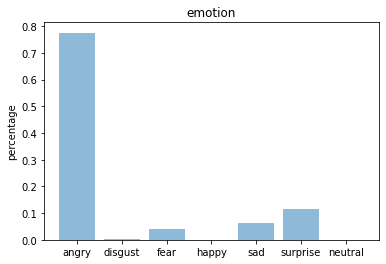

None


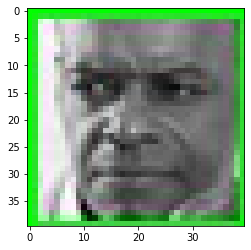

230
Image doesn't exist
231


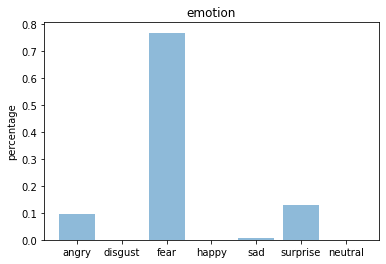

[[9.52867419e-02 2.09079662e-04 7.66520619e-01 2.03312375e-05
  7.54841231e-03 1.30304217e-01 1.10620276e-04]]
0.7665206


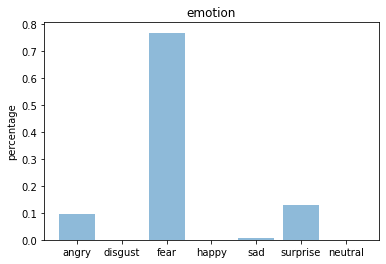

None


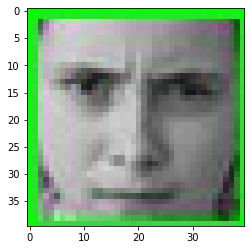

232
Image doesn't exist
233
Image doesn't exist
234


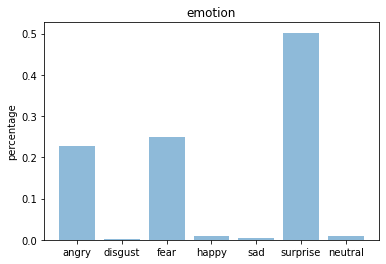

[[0.22629328 0.0007854  0.24920093 0.00843983 0.00470892 0.5020627
  0.00850896]]
0.5020627


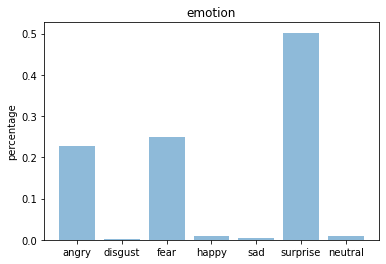

None


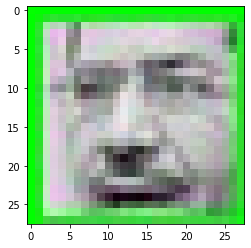

235


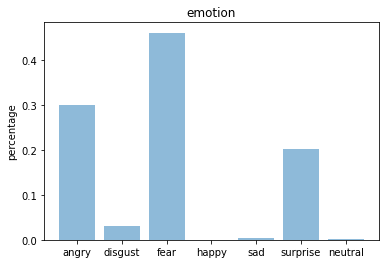

[[3.0021861e-01 3.0177645e-02 4.6183375e-01 2.7039106e-05 4.0952154e-03
  2.0210326e-01 1.5445199e-03]]
0.46183375


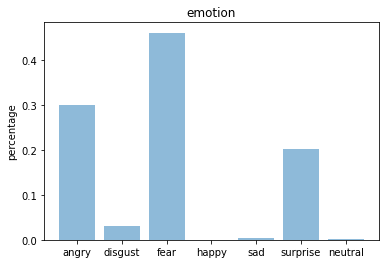

None


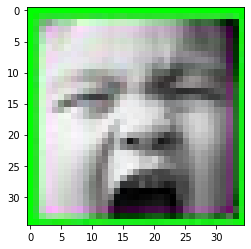

236
Image doesn't exist
237


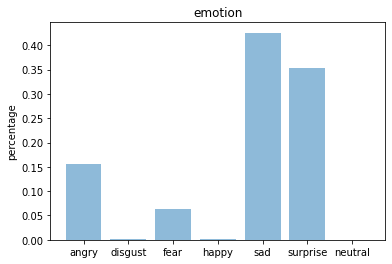

[[1.5586539e-01 6.6913740e-04 6.3075416e-02 1.2977326e-03 4.2586499e-01
  3.5312825e-01 9.9087410e-05]]
0.425865


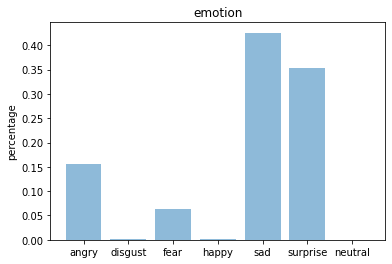

None


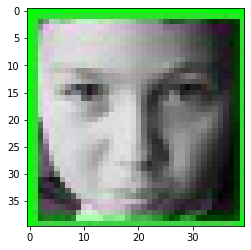

238


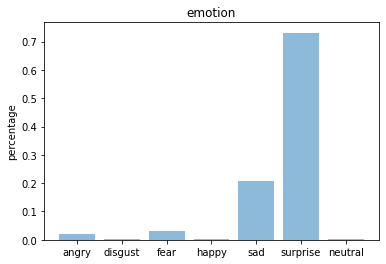

[[0.01984906 0.00169014 0.03179645 0.00302133 0.20932895 0.7315802
  0.00273388]]
0.7315802


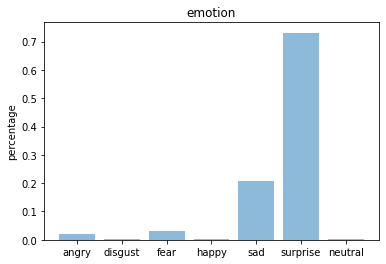

None


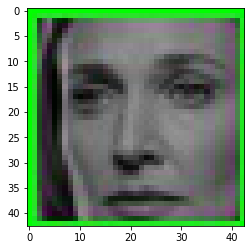

239
Image doesn't exist
240
Image doesn't exist
241
Image doesn't exist
242
Image doesn't exist
243
Image doesn't exist
244
Image doesn't exist
245
Image doesn't exist
246
Image doesn't exist
247
Image doesn't exist
248
Image doesn't exist
249


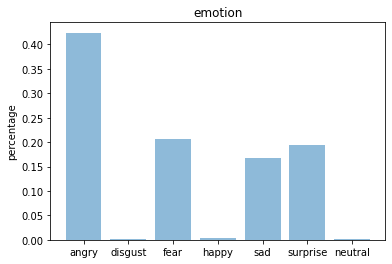

[[0.4241282  0.00253966 0.20569843 0.00454471 0.16658378 0.19455288
  0.00195229]]
0.4241282


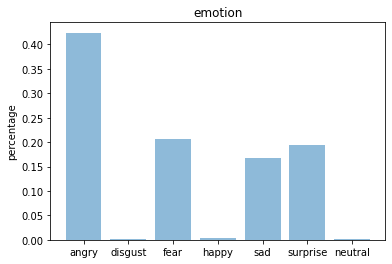

None


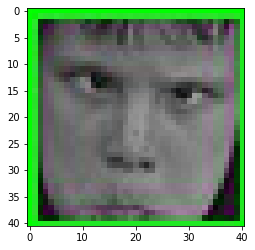

250


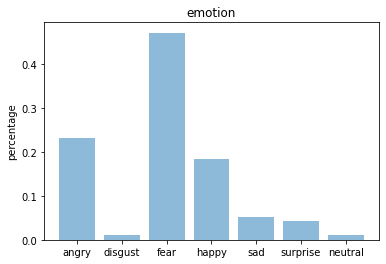

[[0.2318349  0.00993654 0.47071916 0.1829916  0.05169717 0.04286059
  0.00995999]]
0.47071916


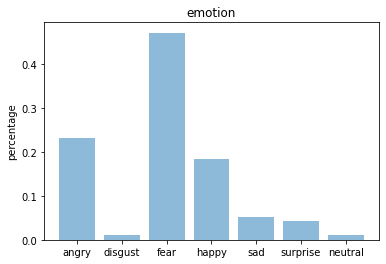

None


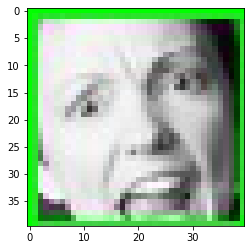

251


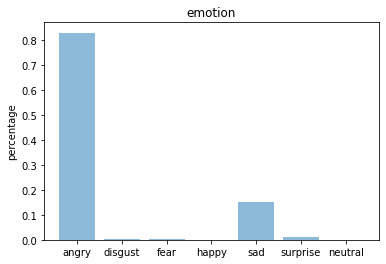

[[8.3011794e-01 1.6500752e-03 5.1733055e-03 2.3381700e-07 1.5102980e-01
  1.2013674e-02 1.4945505e-05]]
0.83011794


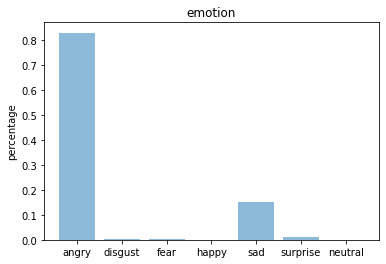

None


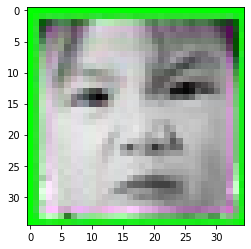

252


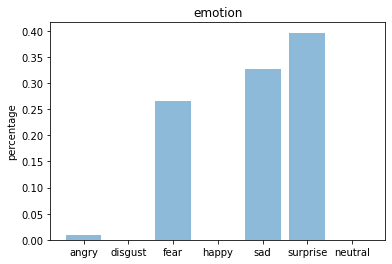

[[1.0055410e-02 3.6599056e-04 2.6668036e-01 1.4202428e-05 3.2635254e-01
  3.9645699e-01 7.4565440e-05]]
0.396457


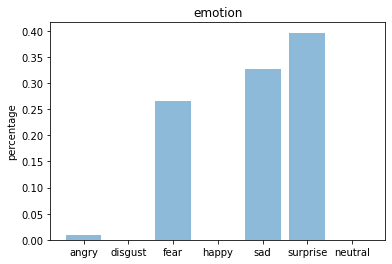

None


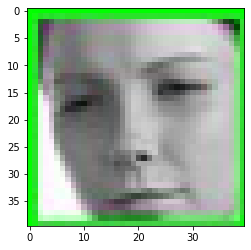

253
Image doesn't exist
254
Image doesn't exist
255


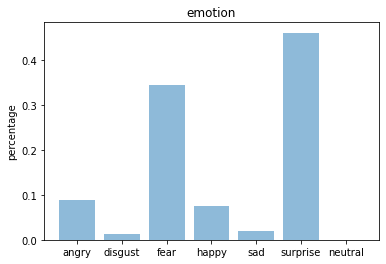

[[0.08852839 0.01212296 0.34308738 0.07560378 0.01975907 0.46041295
  0.0004855 ]]
0.46041295


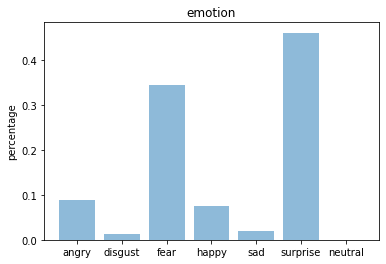

None


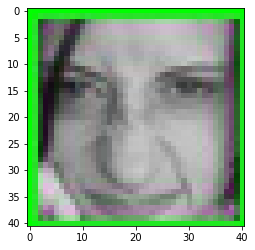

256


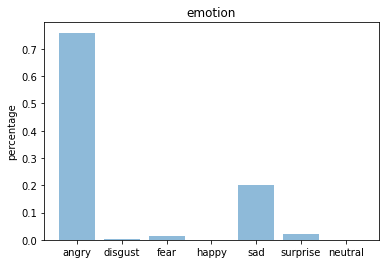

[[7.5918645e-01 3.8398041e-03 1.4399172e-02 1.9151050e-06 2.0180629e-01
  2.0441679e-02 3.2475387e-04]]
0.75918645


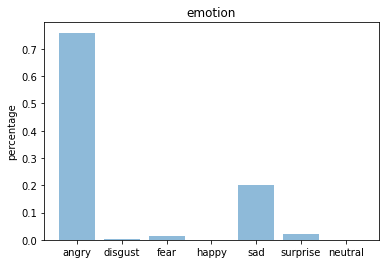

None


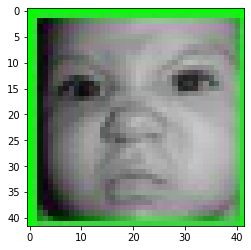

257
Image doesn't exist
258
Image doesn't exist
259
Image doesn't exist
260


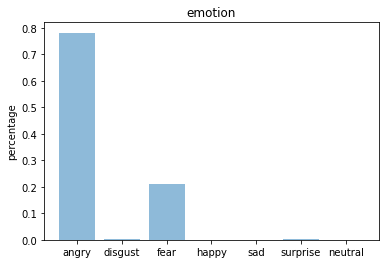

[[7.8140736e-01 3.0437233e-03 2.1236175e-01 1.3907133e-07 3.3798444e-04
  2.0828031e-03 7.6625153e-04]]
0.78140736


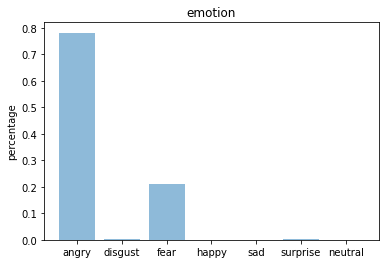

None


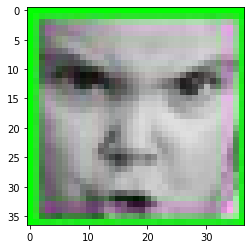

261


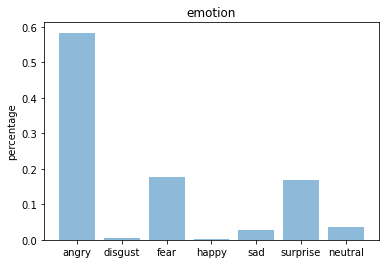

[[0.58396226 0.00548592 0.17687541 0.00116392 0.02721718 0.16918609
  0.03610921]]
0.58396226


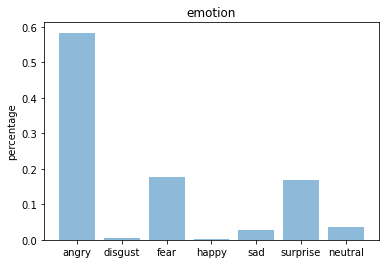

None


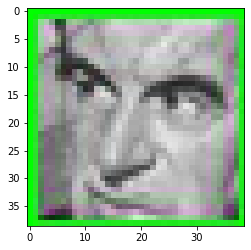

262


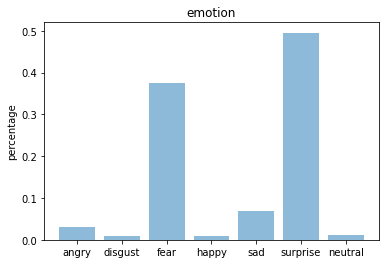

[[0.02953888 0.00858658 0.37575498 0.00889704 0.06982395 0.49540508
  0.01199349]]
0.49540508


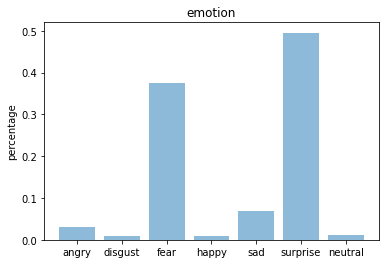

None


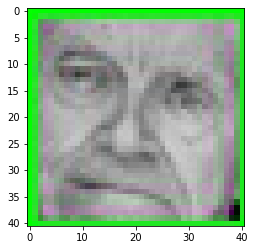

263
Image doesn't exist
264


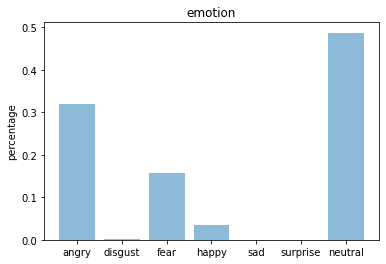

[[3.1965837e-01 8.7110890e-04 1.5696484e-01 3.5421867e-02 1.8188994e-06
  1.6197124e-04 4.8691994e-01]]
0.48691994


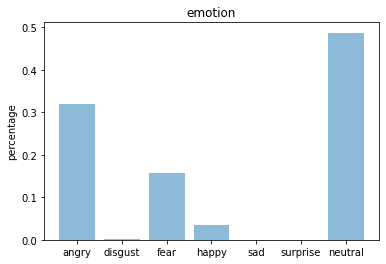

None


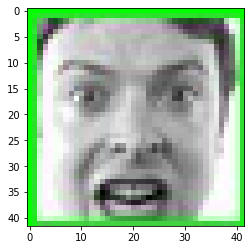

265


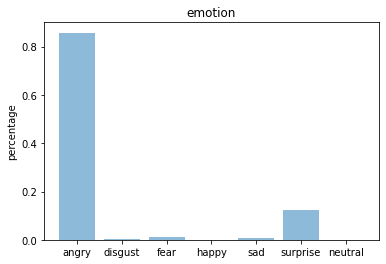

[[8.57561111e-01 1.60373328e-03 1.02656735e-02 1.20696232e-05
  7.64560373e-03 1.22910842e-01 9.82387633e-07]]
0.8575611


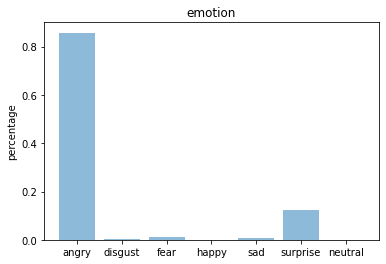

None


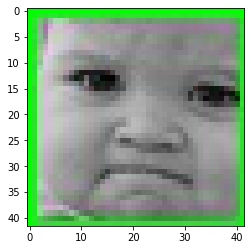

266
Image doesn't exist
267
Image doesn't exist
268
Image doesn't exist
269
Image doesn't exist
270
Image doesn't exist
271
Image doesn't exist
272
Image doesn't exist
273
Image doesn't exist
274
Image doesn't exist
275


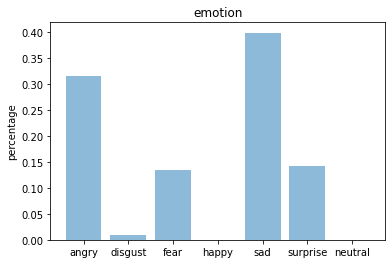

[[3.1456515e-01 8.4134983e-03 1.3524212e-01 1.3341979e-06 3.9875221e-01
  1.4302260e-01 3.1523243e-06]]
0.3987522


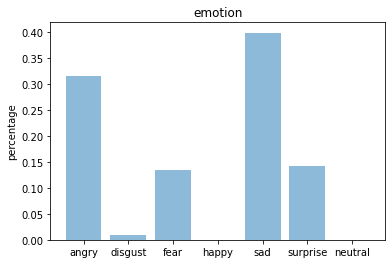

None


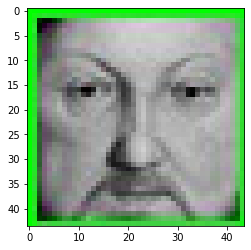

276


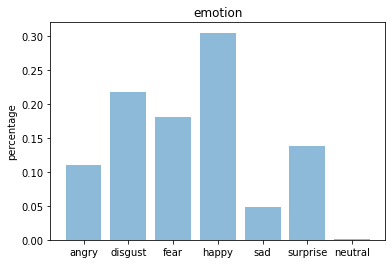

[[0.10997438 0.21676745 0.18043277 0.30472127 0.04861794 0.13845734
  0.00102885]]
0.30472127


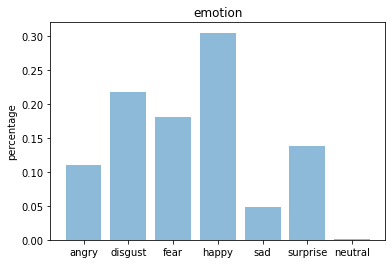

None


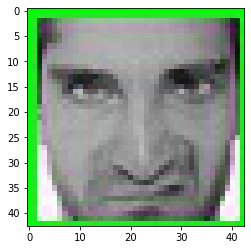

277
Image doesn't exist
278
Image doesn't exist
279
Image doesn't exist
280
Image doesn't exist
281


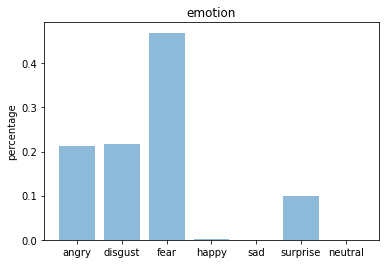

[[2.1316852e-01 2.1646009e-01 4.6913591e-01 1.3884304e-03 1.1700518e-04
  9.9724986e-02 5.0695576e-06]]
0.4691359


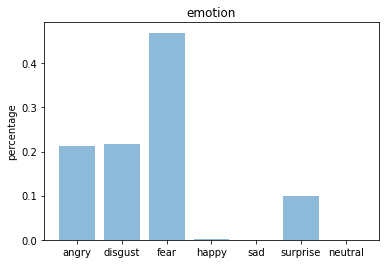

None


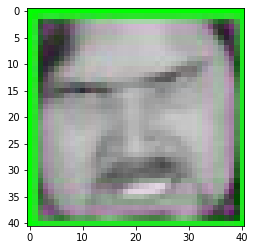

282


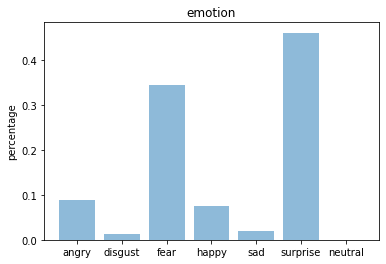

[[0.08852839 0.01212296 0.34308738 0.07560378 0.01975907 0.46041295
  0.0004855 ]]
0.46041295


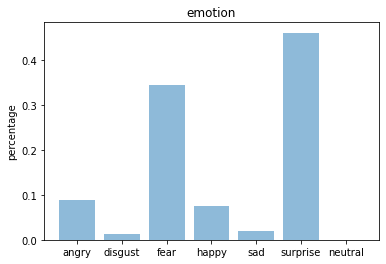

None


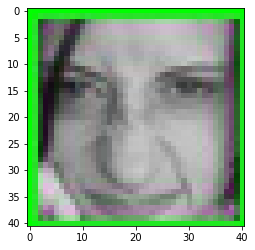

283
Image doesn't exist
284
Image doesn't exist
285
Image doesn't exist
286
Image doesn't exist
287
Image doesn't exist
288
Image doesn't exist
289


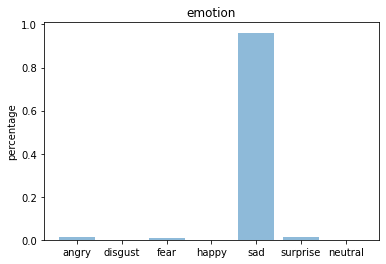

[[1.3630804e-02 2.0623229e-04 8.7395729e-03 2.1929991e-05 9.6170253e-01
  1.4479126e-02 1.2198420e-03]]
0.9617025


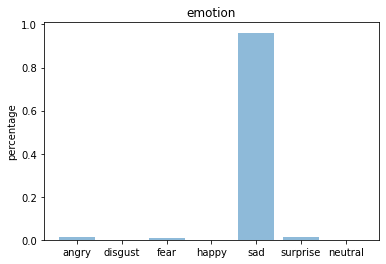

None


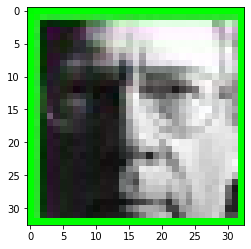

290


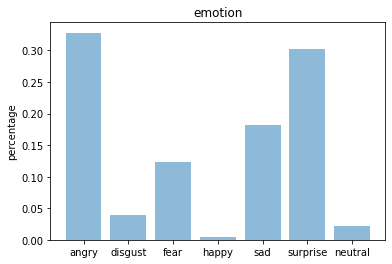

[[0.32804352 0.03850527 0.1230374  0.00403044 0.18223219 0.30158457
  0.02256659]]
0.32804352


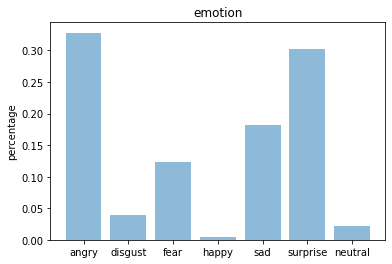

None


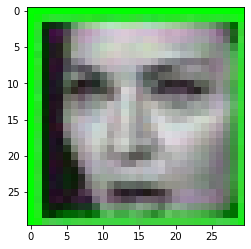

291


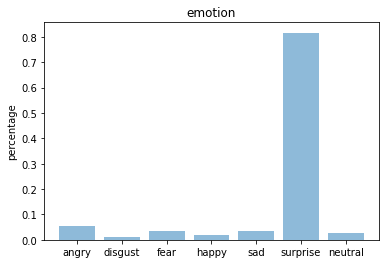

[[0.05295846 0.01051925 0.03566215 0.02045344 0.03589295 0.81639606
  0.02811765]]
0.81639606


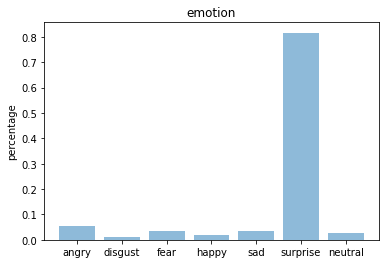

None


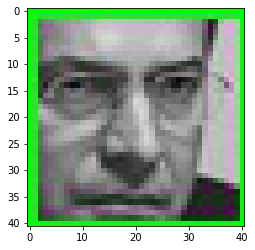

292
Image doesn't exist
293


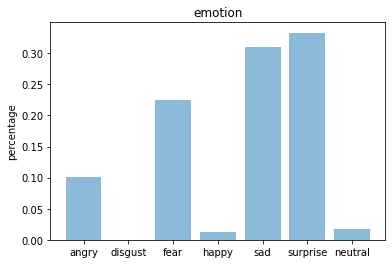

[[1.01411924e-01 3.42930580e-05 2.25239173e-01 1.24865603e-02
  3.10453087e-01 3.32948595e-01 1.74263977e-02]]
0.3329486


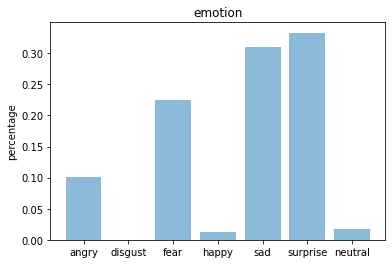

None


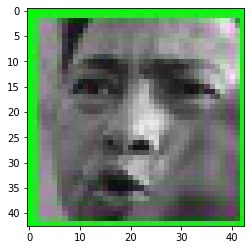

294


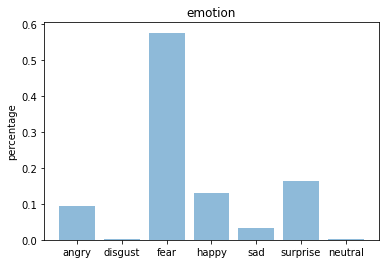

[[0.09435444 0.00155102 0.5753596  0.13010721 0.03282085 0.16466185
  0.00114504]]
0.5753596


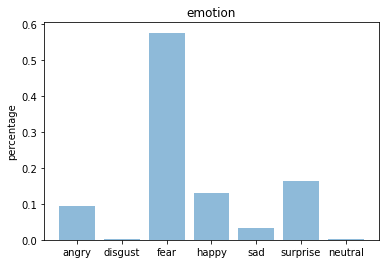

None


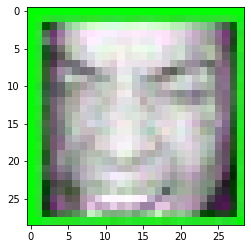

295


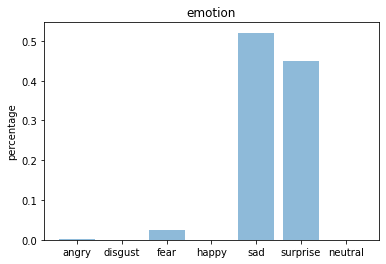

[[3.1144670e-03 4.8766665e-06 2.5260974e-02 4.2020314e-04 5.2064282e-01
  4.5048922e-01 6.7381705e-05]]
0.5206428


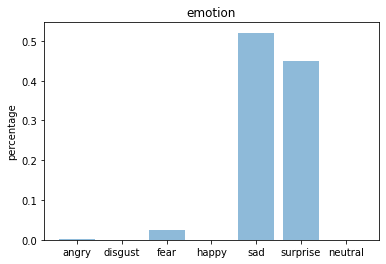

None


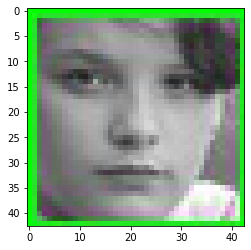

296
Image doesn't exist
297
Image doesn't exist
298
Image doesn't exist
299
Image doesn't exist
300


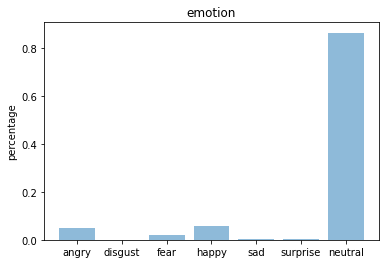

[[5.0749652e-02 9.5161577e-06 2.0490959e-02 5.8121316e-02 5.3932969e-03
  1.6174159e-03 8.6361790e-01]]
0.8636179


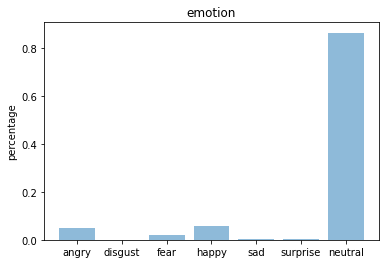

None


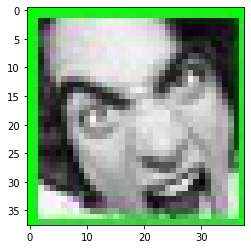

301
Image doesn't exist
302
Image doesn't exist
303


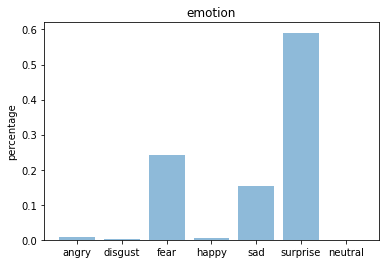

[[7.0796097e-03 1.1904618e-03 2.4143483e-01 4.8703058e-03 1.5459207e-01
  5.9078979e-01 4.2980337e-05]]
0.5907898


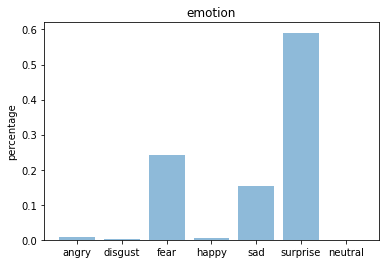

None


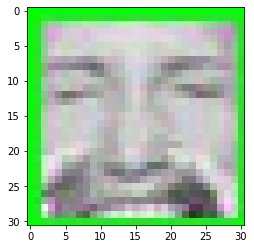

304
Image doesn't exist
305
Image doesn't exist
306
Image doesn't exist
307
Image doesn't exist
308
Image doesn't exist
309


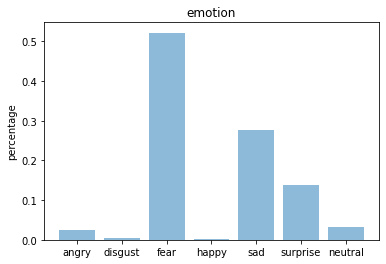

[[0.02435542 0.00456759 0.52208304 0.00079488 0.27712297 0.13889904
  0.03217698]]
0.52208304


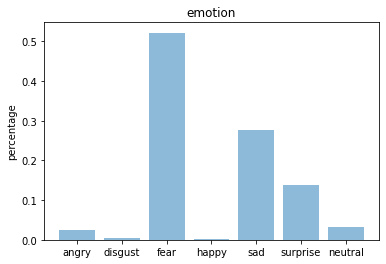

None


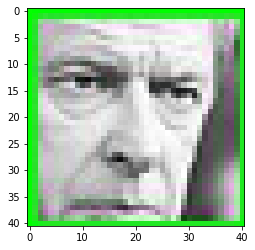

310
Image doesn't exist
311
Image doesn't exist
312
Image doesn't exist
313
Image doesn't exist
314


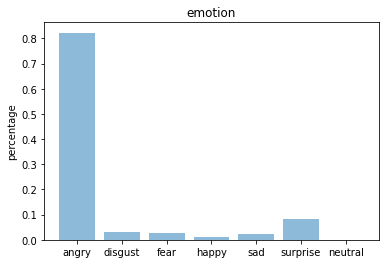

[[0.82269526 0.03078292 0.02706891 0.01212604 0.02204581 0.08424498
  0.00103612]]
0.82269526


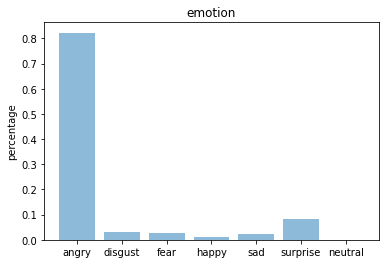

None


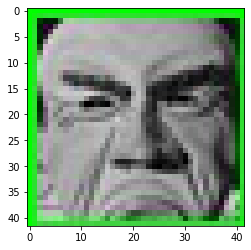

315


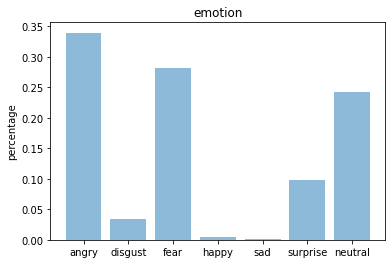

[[0.33937445 0.03404076 0.28152734 0.00455579 0.00103646 0.09804664
  0.24141853]]
0.33937445


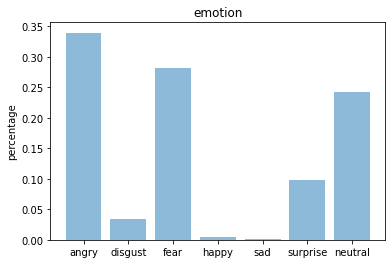

None


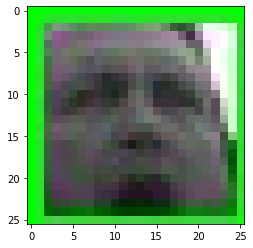

316


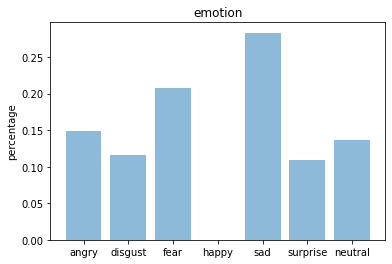

[[1.4847617e-01 1.1544807e-01 2.0773664e-01 1.5823379e-04 2.8314009e-01
  1.0854404e-01 1.3649678e-01]]
0.2831401


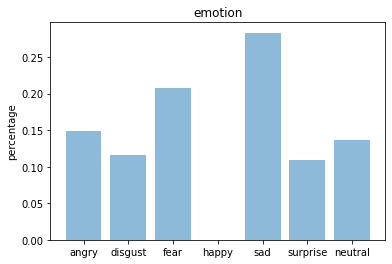

None


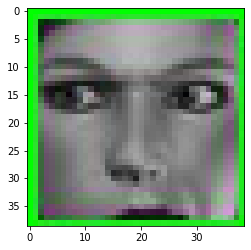

317


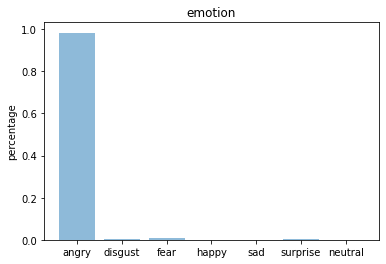

[[9.8368073e-01 4.4602961e-03 8.8174976e-03 4.5121902e-09 5.3114777e-06
  3.0265173e-03 9.6308859e-06]]
0.9836807


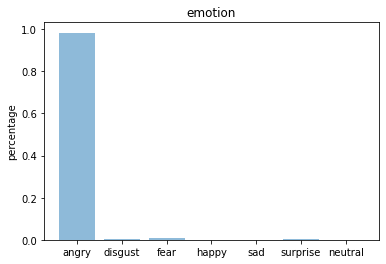

None


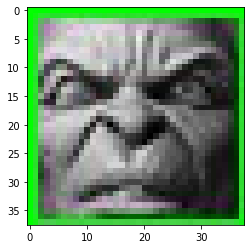

318
Image doesn't exist
319


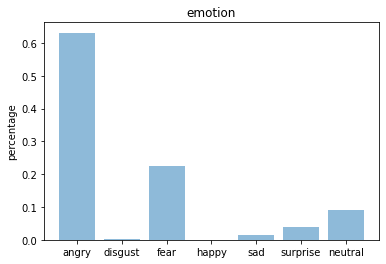

[[6.3144994e-01 1.8682275e-03 2.2357258e-01 5.9157784e-08 1.4664323e-02
  3.7517335e-02 9.0927526e-02]]
0.63144994


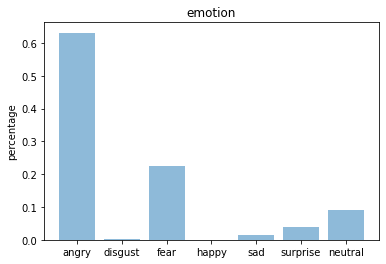

None


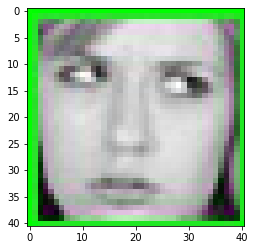

320
Image doesn't exist
321


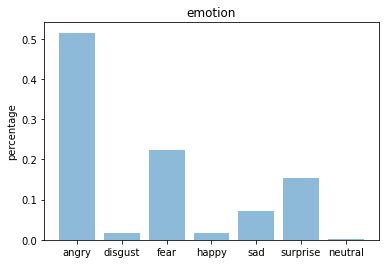

[[0.51510495 0.0161835  0.2222556  0.01800727 0.07215283 0.15411898
  0.00217687]]
0.51510495


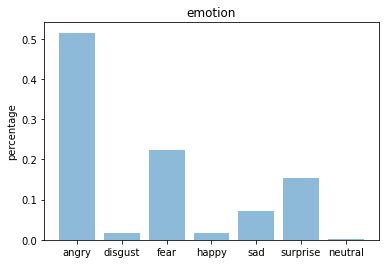

None


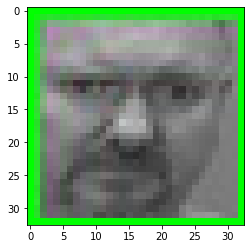

322
Image doesn't exist
323
Image doesn't exist
324
Image doesn't exist
325
Image doesn't exist
326
Image doesn't exist
327
Image doesn't exist
328
Image doesn't exist
329
Image doesn't exist
330


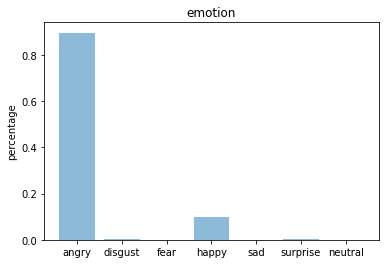

[[8.9644462e-01 1.7065777e-03 8.8930210e-05 9.9035837e-02 9.2699978e-05
  2.6312941e-03 7.1204834e-11]]
0.8964446


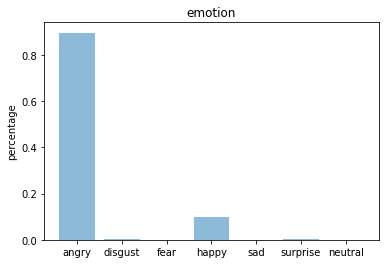

None


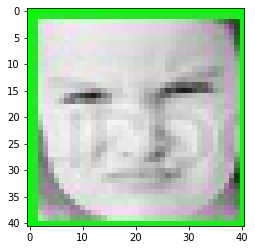

331
Image doesn't exist
332
Image doesn't exist
333
Image doesn't exist
334


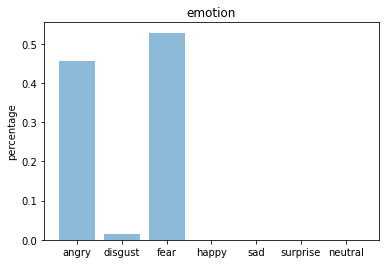

[[4.56300288e-01 1.36739435e-02 5.28769135e-01 7.54127512e-04
  1.24508486e-04 2.16312881e-04 1.61597782e-04]]
0.52876914


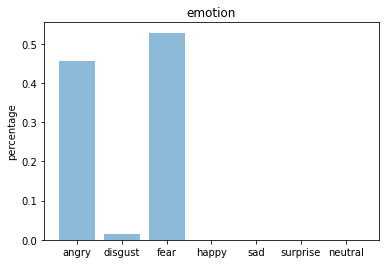

None


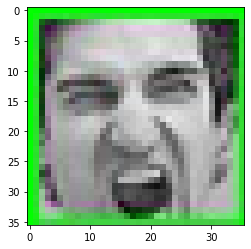

335


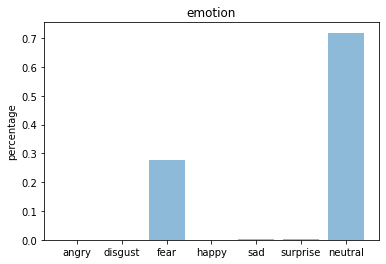

[[1.0257108e-03 3.9411475e-06 2.7554125e-01 7.1480448e-05 1.5263020e-03
  3.0716266e-03 7.1875972e-01]]
0.7187597


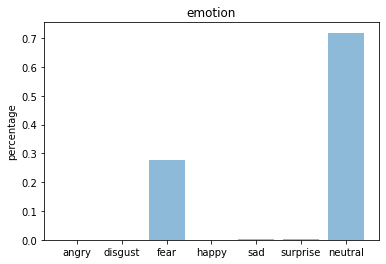

None


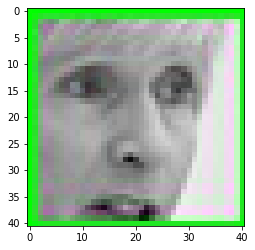

336


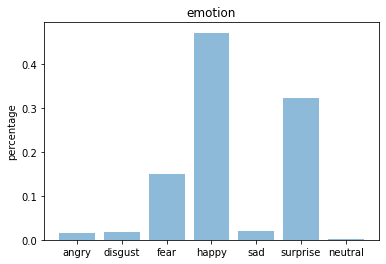

[[0.0155244  0.01740026 0.14997064 0.47124407 0.02062107 0.32367545
  0.0015642 ]]
0.47124407


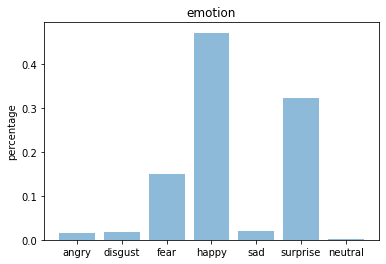

None


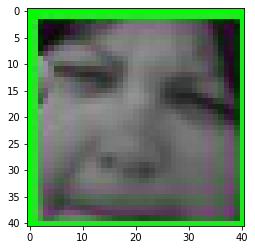

337


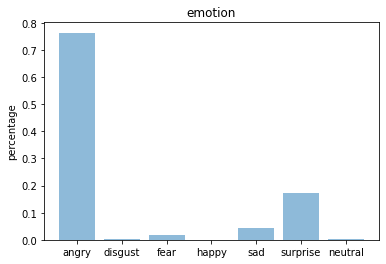

[[7.6322532e-01 2.6604335e-03 1.6552569e-02 3.5213966e-07 4.4006258e-02
  1.7118476e-01 2.3702758e-03]]
0.7632253


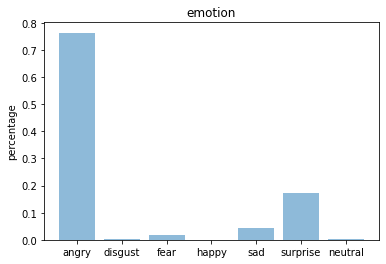

None


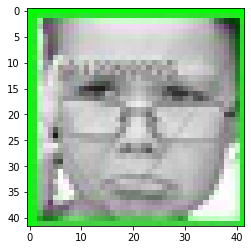

338
Image doesn't exist
339
Image doesn't exist
340
Image doesn't exist
341
Image doesn't exist
342


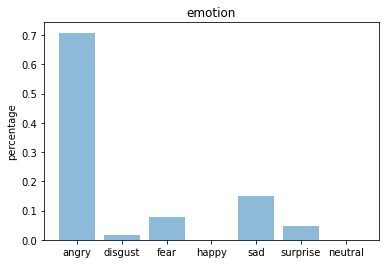

[[7.0849288e-01 1.6296579e-02 7.7251509e-02 4.7092431e-07 1.5053135e-01
  4.7421224e-02 5.9826157e-06]]
0.7084929


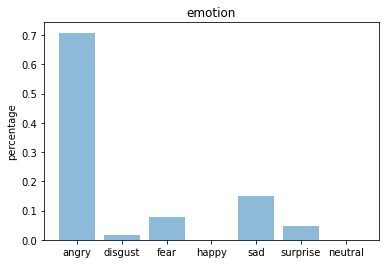

None


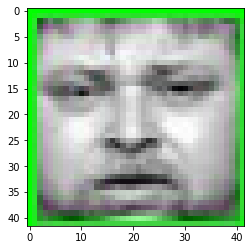

343
Image doesn't exist
344


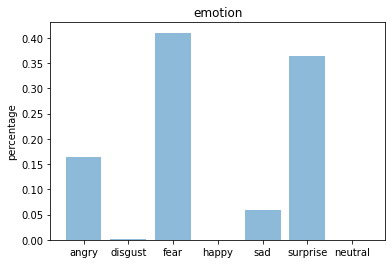

[[1.6416809e-01 2.5073064e-03 4.0992615e-01 3.3810586e-04 5.9672933e-02
  3.6336532e-01 2.2143020e-05]]
0.40992615


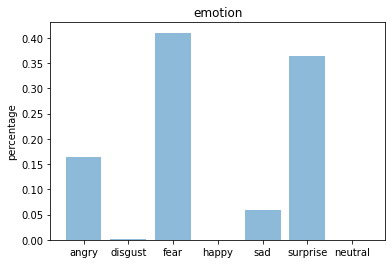

None


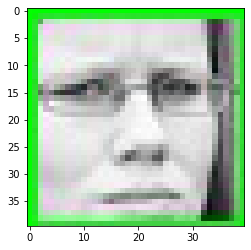

345


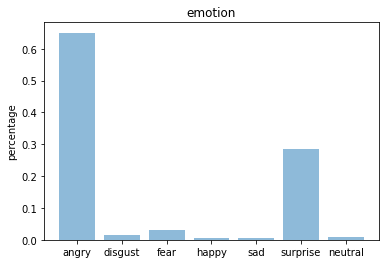

[[0.6504615  0.01519619 0.03171439 0.00502542 0.00566179 0.28379256
  0.00814821]]
0.6504615


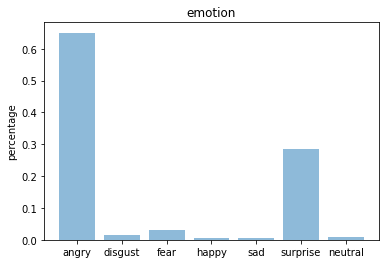

None


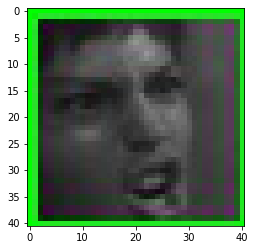

346


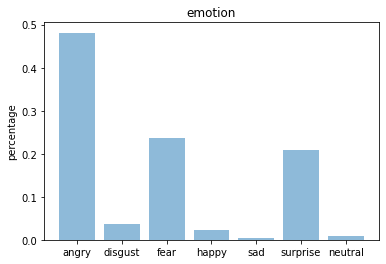

[[0.48120752 0.03597006 0.2376776  0.02315226 0.00355875 0.20931932
  0.00911452]]
0.48120752


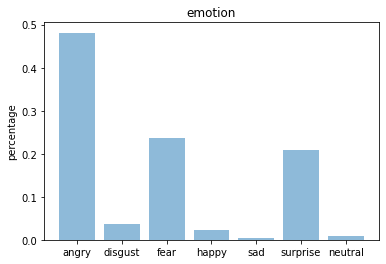

None


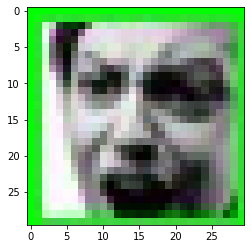

347
Image doesn't exist
348
Image doesn't exist
349
Image doesn't exist
350


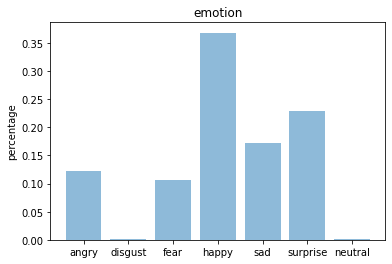

[[0.12163726 0.00214688 0.10589084 0.36823532 0.17183256 0.2287386
  0.00151854]]
0.36823532


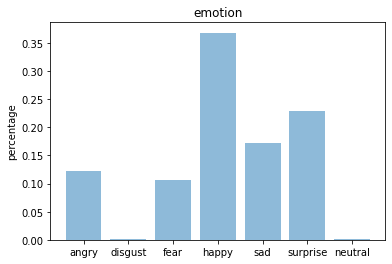

None


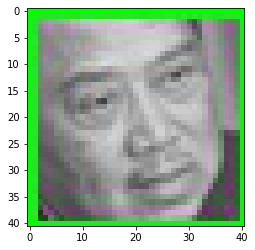

351


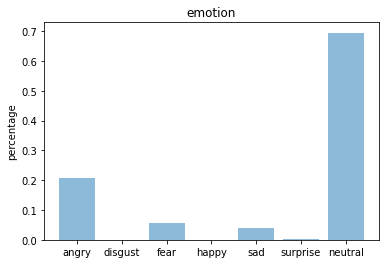

[[2.0730509e-01 2.8468156e-04 5.7015020e-02 4.8145824e-07 3.8687397e-02
  1.8464993e-03 6.9486076e-01]]
0.69486076


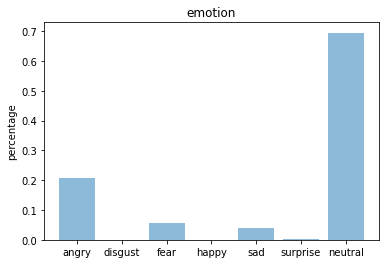

None


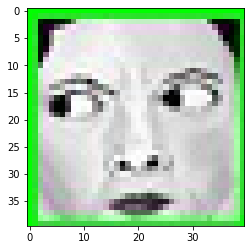

352


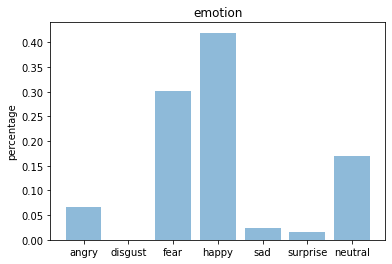

[[0.06698215 0.00056635 0.3019486  0.41964602 0.02378999 0.01653882
  0.17052801]]
0.41964602


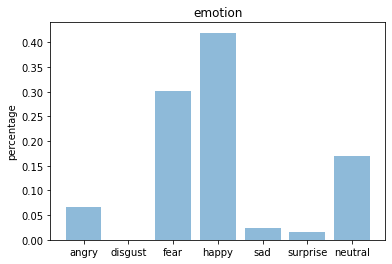

None


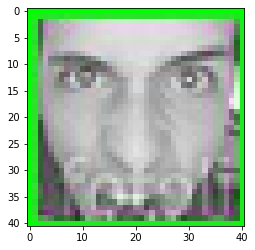

353
Image doesn't exist


In [8]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import spicy as sc
from scipy import misc


folder_valid = 'C:/Users/User/Desktop/test/angry_valid'
# 'C:/Users/User/Desktop/test/angry_valid/capture  {0}.jpg'
all_vald_img = []
photo_count = 0
angry = 0
disgust = 0
fear = 0
happy = 0
sad = 0
surprise = 0
neutral = 0
    
for filename_valid in os.listdir(folder_valid):
    photo_count += 1
    img_valid = cv2.imread(os.path.join(folder_valid,filename_valid))
    if img_valid is not None:
        all_vald_img.append(img_valid)

# print(all_vald_img)

# print(len(all_vald_img))
#     if photo_count == len(all_vald_img):
#         pass
    try:
        file  = 'C:/Users/User/Desktop/test/angry_valid/capture{0}.jpg'.format(photo_count)
        print(photo_count)
        true_image = image.load_img(file)
        img = image.load_img(file, color_mode="grayscale", target_size=(48, 48))


        #  --------------------------------------------------------------------------------
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis = 0)

        x /= 255

        custom = model.predict(x)
        emotion_analysis(custom[0])
        emo_reff = {'angry': custom[0][0], 'disgust': custom[0][1], 'fear': custom[0][2], 'happy': custom[0][3],
                    'sad': custom[0][4], 'surprise': custom[0][5], 'neutral': custom[0][6]}
        print(custom)
        print(max(custom[0]))
        print(emotion_analysis(custom[0]))
        if max(custom[0]) == emo_reff['angry']:
            angry += 1
        elif max(custom[0]) == emo_reff['disgust']:
            disgust += 1
        elif max(custom[0]) == emo_reff['fear']:
            fear += 1
        elif max(custom[0]) == emo_reff['happy']:
            happy += 1
        elif max(custom[0]) == emo_reff['sad']:
            sad += 1
        elif max(custom[0]) == emo_reff['surprise']:
            surprise += 1
        else:
            neutral += 1
            

        x = np.array(x, 'float32')
        x = x.reshape([48, 48]);

        plt.imshow(true_image)
        plt.show()
    except:
        print("Image doesn't exist")
        continue
        
#     ----------------------------------------------------------------------------------
#     file  = 'C:/Users/User/Desktop/test/angry_valid/capture355.jpg'
# #     print(photo_count)
#     true_image = image.load_img(file)
#     img = image.load_img(file, color_mode="grayscale", target_size=(48, 48))


#     #  --------------------------------------------------------------------------------
#     x = image.img_to_array(img)
#     x = np.expand_dims(x, axis = 0)

#     x /= 255

#     custom = model.predict(x)
#     emotion_analysis(custom[0])
#     print(custom)
#     print(max(custom[0]))
#     print(emotion_analysis(custom[0]))

#     x = np.array(x, 'float32')
#     x = x.reshape([48, 48]);

#     plt.imshow(true_image)
#     plt.show()

In [9]:
print("angry =", angry)
print("disgust =", disgust)
print("fear =", fear)
print("happy =", happy)
print("sad =", sad)
print("surprise =", surprise)
print("neutral =", neutral)
print("\n")

total = angry + disgust + fear + happy + sad + surprise + neutral
print("Total =", total)

print("angry precentage % =", (angry/total) *100)


angry = 61
disgust = 2
fear = 24
happy = 7
sad = 19
surprise = 26
neutral = 7


Total = 146
angry precentage % = 41.78082191780822
